# <font color='blue'>Linear Regression Model on Pune Housing Dataset</font>

### 🏡 Real Estate Price Prediction

This project focuses on **predicting the price of residential properties in Pune** using a supervised machine learning approach.

We will leverage the **Pune Housing Dataset**, which contains various features related to real estate properties such as size, location, number of bedrooms, and more.

Our goal is to build a **Linear Regression model** to estimate the price of a property based on these input features.

> 💡 **Note**: Property prices in the dataset are expressed in **lakhs of INR (₹)**.


In [154]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
%matplotlib inline 
#stored within the notebook
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20, 10)
import warnings
warnings.filterwarnings('ignore')

In [155]:
#Pune_House_Data -> Data set 
#Importing the data set
Data_frame = pd.read_csv("Pune_House_Data.csv", na_values=[' ?'])
Data_frame.head(10)

,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,19-Dec,2 BHK,Coomee,1056,2.00,1.00,39.07,Alandi Road
1,Plot Area,Ready To Move,4 Bedroom,Theanmp,2600,5.00,3.00,120.00,Ambegaon Budruk
2,Built-up Area,Ready To Move,3 BHK,NaN,1440,2.00,3.00,62.00,Anandnagar
3,Super built-up Area,Ready To Move,3 BHK,Soiewre,1521,3.00,1.00,95.00,Aundh
4,Super built-up Area,Ready To Move,2 BHK,NaN,1200,2.00,1.00,51.00,Aundh Road
5,Super built-up Area,Ready To Move,2 BHK,DuenaTa,1170,2.00,1.00,38.00,Balaji Nagar
6,Super built-up Area,18-May,4 BHK,Jaades,2732,4.00,NaN,204.00,Baner
7,Super built-up Area,Ready To Move,4 BHK,Brway G,3300,4.00,NaN,600.00,Baner road
8,Super built-up Area,Ready To Move,3 BHK,NaN,1310,3.00,1.00,63.25,Bhandarkar Road
9,Plot Area,Ready To Move,6 Bedroom,NaN,1020,6.00,NaN,370.00,Bhavani Peth


In [156]:
for i in Data_frame.columns:
    print(Data_frame[i].value_counts())
    print("\n")

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64


availability
Ready To Move           10581
18-Dec                    307
18-May                    295
18-Apr                    271
18-Aug                    200
19-Dec                    185
18-Jul                    143
18-Mar                    131
18-Jun                     99
20-Dec                     98
21-Dec                     93
19-Mar                     88
18-Feb                     62
18-Nov                     47
18-Jan                     43
18-Sep                     41
19-Jun                     40
18-Oct                     39
19-Jan                     39
19-Jul                     36
17-Dec                     29
20-Jan                     24
17-Oct                     21
19-Sep                     21
22-Jun                     19
19-Aug                     18
21-Jun                     17
19-Apr                 

In [157]:
for i in Data_frame.columns:
    print(f'{i} \n {Data_frame[i].unique()}')
    print("\n")

area_type 
 ['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area']


availability 
 ['19-Dec' 'Ready To Move' '18-May' '18-Feb' '18-Nov' '20-Dec' '17-Oct'
 '21-Dec' '19-Sep' '20-Sep' '18-Mar' '20-Feb' '18-Apr' '20-Aug' '18-Oct'
 '19-Mar' '17-Sep' '18-Dec' '17-Aug' '19-Apr' '18-Jun' '22-Dec' '22-Jan'
 '18-Aug' '19-Jan' '17-Jul' '18-Jul' '21-Jun' '20-May' '19-Aug' '18-Sep'
 '17-May' '17-Jun' '21-May' '18-Jan' '20-Mar' '17-Dec' '16-Mar' '19-Jun'
 '22-Jun' '19-Jul' '21-Feb' 'Immediate Possession' '19-May' '17-Nov'
 '20-Oct' '20-Jun' '19-Feb' '21-Oct' '21-Jan' '17-Mar' '17-Apr' '22-May'
 '19-Oct' '21-Jul' '21-Nov' '21-Mar' '16-Dec' '22-Mar' '20-Jan' '21-Sep'
 '21-Aug' '14-Nov' '19-Nov' '15-Nov' '16-Jul' '15-Jun' '17-Feb' '20-Nov'
 '20-Jul' '16-Sep' '15-Oct' '15-Dec' '16-Oct' '22-Nov' '15-Aug' '17-Jan'
 '16-Nov' '20-Apr' '16-Jan' '14-Jul']


size 
 ['2 BHK' '4 Bedroom' '3 BHK' '4 BHK' '6 Bedroom' '3 Bedroom' '1 BHK'
 '1 RK' '1 Bedroom' '8 Bedroom' '2 Bedroom' '7 Bedroom' '5 BH

In [158]:
Data_frame.shape

(13320, 9)

In [159]:
Data_frame.describe(include='all') 

,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location
count,13320,13320,13304,7818,13320,13247.00,12711.00,13320.00,13319
unique,4,81,31,2688,2117,NaN,NaN,NaN,97
top,Super built-up Area,Ready To Move,2 BHK,GrrvaGr,1200,NaN,NaN,NaN,Alandi Road
freq,8790,10581,5199,80,843,NaN,NaN,NaN,139
mean,NaN,NaN,NaN,NaN,NaN,2.69,1.58,112.57,NaN
std,NaN,NaN,NaN,NaN,NaN,1.34,0.82,148.97,NaN
min,NaN,NaN,NaN,NaN,NaN,1.00,0.00,8.00,NaN
25%,NaN,NaN,NaN,NaN,NaN,2.00,1.00,50.00,NaN
50%,NaN,NaN,NaN,NaN,NaN,2.00,2.00,72.00,NaN
75%,NaN,NaN,NaN,NaN,NaN,3.00,2.00,120.00,NaN



> ##### While predicting the price of a property, features like **'availability'** and **'society'** have relatively **lower impact** compared to other key factors such as location, size, and number of bedrooms.

In [160]:
Data_frame_copy = Data_frame.copy()
Data_frame.drop(['availability', 'society'], axis=1, inplace=True)


## <font color='blue'>Handling Missing Values / Data Cleaning</font>

##### The dataset contains **missing values** in several columns.

Since the total number of rows is **13,320**, any column with a lower non-null count indicates the presence of missing data.
We'll perform **data cleaning** to handle these inconsistencies before moving forward with modeling.


In [161]:
Data_frame.isnull().sum()

area_type          0
size              16
total_sqft         0
bath              73
balcony          609
price              0
site_location      1
dtype: int64


#### 🔹 Step 1: Dropping and Replacing Missing Values

For columns with very few missing entries — such as **1**, **16**, or **73** missing values — compared to the total of **13,320 rows**, we can safely **drop those rows** without significantly affecting the dataset.

However, for columns like **'balcony'**, which has **609 missing values**, it's better to **impute** the missing values using the **mean** or **median**, depending on the presence of outliers in the data.


In [162]:
# Droping Missing Values 
Data_frame.dropna(subset = ['site_location', 'size', 'bath'], inplace=True)
Data_frame.shape

(13246, 7)

In [163]:
Data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13246 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area_type      13246 non-null  object 
 1   size           13246 non-null  object 
 2   total_sqft     13246 non-null  object 
 3   bath           13246 non-null  float64
 4   balcony        12710 non-null  float64
 5   price          13246 non-null  float64
 6   site_location  13246 non-null  object 
dtypes: float64(3), object(4)
memory usage: 827.9+ KB


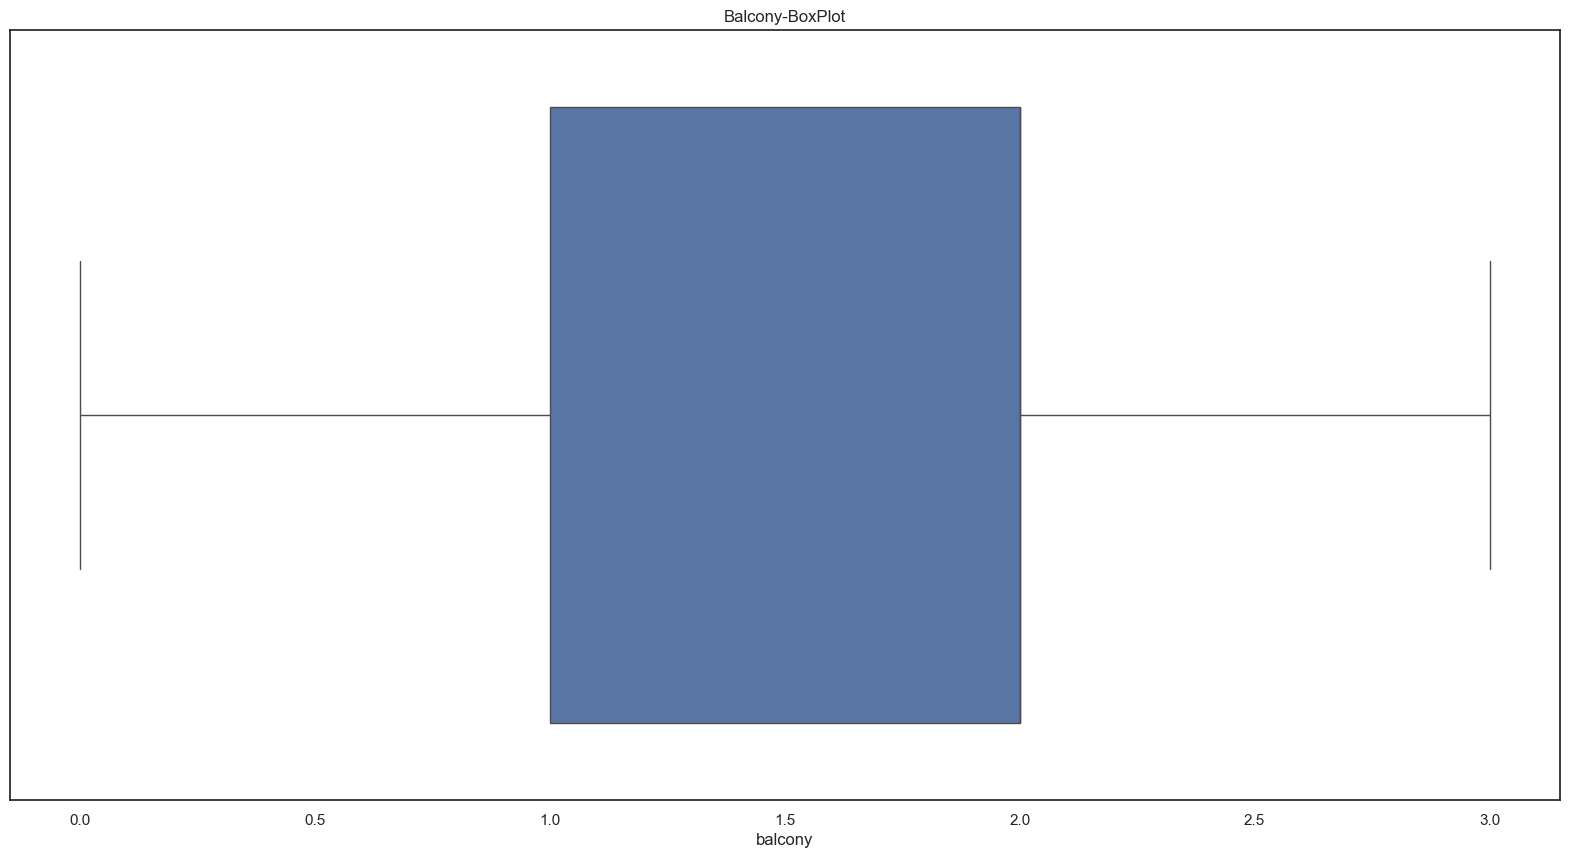

In [164]:
#Replacing Missing Values
sns.boxplot(x='balcony', data=Data_frame)
plt.title("Balcony-BoxPlot")
plt.show()
#Replacing the missing data with mean 
Data_frame['balcony'].replace(np.nan, Data_frame['balcony'].mean(), inplace=True)

In [165]:
Data_frame.isnull().sum()

area_type        0
size             0
total_sqft       0
bath             0
balcony          0
price            0
site_location    0
dtype: int64


#### 🔹 Step 2: Standardizing the 'size' Feature

The **'size'** column contains entries in different formats, such as **'2 BHK'** and **'2 Bedroom'**, which represent the same information.

To ensure consistency, we will **extract only the numeric part** from this feature, as it reflects the number of bedrooms, regardless of the text format.

In [166]:
Data_frame['BHK'] = Data_frame['size'].apply(lambda x: int(x.split(' ')[0]))
Data_frame.drop(['size'], axis=1, inplace=True)
Data_frame.head()

,area_type,total_sqft,bath,balcony,price,site_location,BHK
0,Super built-up Area,1056,2.00,1.00,39.07,Alandi Road,2
1,Plot Area,2600,5.00,3.00,120.00,Ambegaon Budruk,4
2,Built-up Area,1440,2.00,3.00,62.00,Anandnagar,3
3,Super built-up Area,1521,3.00,1.00,95.00,Aundh,3
4,Super built-up Area,1200,2.00,1.00,51.00,Aundh Road,2


#### 🔹 Step 3: Cleaning the 'total\_sqft' Feature

The **'total\_sqft'** column should ideally contain **numeric (float)** values, but it's currently of **object** type due to inconsistent and unstructured inputs. Some entries are in the format like:

* `"2100 - 2850"` (range of values)
* Units like `"Sq. Yards"`, `"Acres"`, `"Grounds"`, etc.

#### ✅ Solution:

* For entries with ranges (e.g., `"2100 - 2850"`), we will **take the average** of the two values.
* For entries with different measurement units, we will **convert them into square feet (sqft)** using appropriate conversion factors.
* After these transformations, all values in the **'total\_sqft'** column will be standardized and the data type will be converted to **float** for further analysis.

In [167]:
print(f"{Data_frame['total_sqft'].value_counts()} \n\n {Data_frame['total_sqft'].unique()}")

total_sqft
1200    843
1100    221
1500    204
2400    195
600     180
       ... 
5985      1
3580      1
2461      1
1437      1
4689      1
Name: count, Length: 2067, dtype: int64 

 ['1056' '2600' '1440' ... '1133 - 1384' '774' '4689']


In [168]:
# We can convert these values to float but values with ranges will give us error so we can create a filter type function

def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

~Data_frame['total_sqft'].apply(is_float)
Temp_df = Data_frame[~Data_frame['total_sqft'].apply(is_float)]


In [169]:
def check_abnormal(x):
    if '-' in x:
        return False
    else:
        return True

Temp_df['total_sqft'][Temp_df['total_sqft'].apply(check_abnormal)].value_counts()

total_sqft
142.61Sq. Meter    2
34.46Sq. Meter     1
1Grounds           1
24Guntha           1
697Sq. Meter       1
1500Cents          1
132Sq. Yards       1
2Acres             1
1100Sq. Meter      1
15Acres            1
1.26Acres          1
151.11Sq. Yards    1
2940Sq. Yards      1
84.53Sq. Meter     1
45.06Sq. Meter     1
1.25Acres          1
86.72Sq. Meter     1
38Guntha           1
6Acres             1
120Sq. Yards       1
24Sq. Meter        1
142.84Sq. Meter    1
2.09Acres          1
122Sq. Yards       1
4125Perch          1
117Sq. Yards       1
1000Sq. Meter      1
1100Sq. Yards      1
5.31Acres          1
30Acres            1
716Sq. Meter       1
1500Sq. Meter      1
1574Sq. Yards      1
361.33Sq. Yards    1
3040Sq. Meter      1
78.03Sq. Meter     1
500Sq. Yards       1
167Sq. Meter       1
315Sq. Yards       1
3Cents             1
188.89Sq. Yards    1
204Sq. Meter       1
45Sq. Yards        1
133.3Sq. Yards     1
300Sq. Yards       1
Name: count, dtype: int64

In [170]:
len(Temp_df['total_sqft'][Temp_df['total_sqft'].apply(check_abnormal)].unique())

45

#### 🔹 Common Unit Conversions to Square Feet (sqft)

To standardize the **'total\_sqft'** values, we need to convert all entries to **square feet** using the following conversion rates:

* **1 Sq. Meter** = **10.76 sqft**
* **1 Perch** = **272.25 sqft**
* **1 Sq. Yard** = **9 sqft**
* **1 Acre** = **43,560.04 sqft**
* **1 Cent** = **435.56 sqft**
* **1 Guntha** = **1,089 sqft**
* **1 Ground** = **2,400.35 sqft**

These conversion factors will be used to ensure all area values are consistent and numerical, making the dataset suitable for model training.


In [171]:
#Creating Function to Convert ranges to a single Value 

def abnormal_change(x):
    if "Sq. Meter" in x:
        num = x.split("S")
        result = float(num[0]) * 10.76
        return result
    if "Perch" in x:
        num = x.split("P")
        result = float(num[0]) * 272.25
        return result
    if "Sq. Yards" in x:
        num = x.split("S")
        result = float(num[0]) * 9.00
        return result
    if "Acres" in x:
        num = x.split("A")
        result = float(num[0]) * 43560.04
        return result
    if "Cents" in x:
        num = x.split("C")
        result = float(num[0]) * 435.56
        return result
    if "Guntha" in x:
        num = x.split("G")
        result = float(num[0]) * 1089.00
        return result
    if "Grounds" in x:
        num = x.split("G")
        result = float(num[0]) * 2400.35
        return result

def convert_range_to_num(x):
    if '-' in x:
        num = x.split('-')
        result1 = (float(num[0]) + float(num[1]))/2
    else:
        bool_val = x.upper().isupper()
        if bool_val == True:
            result1 = abnormal_change(x)
        else:
            result1 = float(x)
    return result1

Data_frame['total_sqft'] = Data_frame['total_sqft'].apply(convert_range_to_num)

In [172]:
Data_frame.isnull().sum()

area_type        0
total_sqft       0
bath             0
balcony          0
price            0
site_location    0
BHK              0
dtype: int64

In [173]:
Data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13246 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area_type      13246 non-null  object 
 1   total_sqft     13246 non-null  float64
 2   bath           13246 non-null  float64
 3   balcony        13246 non-null  float64
 4   price          13246 non-null  float64
 5   site_location  13246 non-null  object 
 6   BHK            13246 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 827.9+ KB


In [174]:
Data_frame.rename(columns = {'bath':'bathroom'}, inplace=True)
Data_frame.columns

Index(['area_type', 'total_sqft', 'bathroom', 'balcony', 'price',
       'site_location', 'BHK'],
      dtype='object')

In [175]:
# Adding a Column / Feature which is important for future use [outlier treatment ] + gives a proper insight of a property
Data_frame['price_per_sqft'] = Data_frame['price']*100000 / Data_frame['total_sqft']
Data_frame.head()

,area_type,total_sqft,bathroom,balcony,price,site_location,BHK,price_per_sqft
0,Super built-up Area,1056.00,2.00,1.00,39.07,Alandi Road,2,3699.81
1,Plot Area,2600.00,5.00,3.00,120.00,Ambegaon Budruk,4,4615.38
2,Built-up Area,1440.00,2.00,3.00,62.00,Anandnagar,3,4305.56
3,Super built-up Area,1521.00,3.00,1.00,95.00,Aundh,3,6245.89
4,Super built-up Area,1200.00,2.00,1.00,51.00,Aundh Road,2,4250.00


#### 🔹 Handling Categorical Variables (Encoding)

The dataset contains **two categorical features** that need to be encoded before feeding them into the model.

* **Label Encoding** can introduce **unintended ordinal relationships**, since it assigns numeric values based on the alphabetical order of categories — which can mislead the model when no such order exists.

* **One-Hot Encoding**, while more appropriate for nominal data, can lead to a **high-dimensional feature space** (commonly referred to as the **curse of dimensionality**) if the number of unique categories is large.

##### ✅ Solution:

To manage this:

* We'll **group rare categories** (those with very low frequency) into a generic category like **"Other"** to reduce dimensionality without losing significant information.
* The **`area_type`** feature has limited unique values and won’t cause dimensionality issues.
* We need to carefully inspect the **`location`** feature, as it likely has a high number of unique values and may require grouping rare locations.


In [176]:
count_site_location = len(Data_frame['site_location'].unique())
print(count_site_location)
pd.set_option('display.max_rows', count_site_location)
Location_data = Data_frame.groupby('site_location')['site_location'].agg('count').sort_values(ascending=False)
Location_data.head(200)

97


site_location
Alandi Road                   139
Karve Nagar                   139
Paud Road                     139
Ganeshkhind                   139
Parvati Darshan               139
Gokhale Nagar                 139
Guruwar peth                  139
Hingne Khurd                  139
Jangali Maharaj Road          139
Nana Peth                     139
Nagar Road                    139
Erandwane                     139
Kasba Peth                    139
Katraj                        139
Khadaki                       139
Kharadi                       139
Kondhwa                       139
Koregaon Park                 139
Ambegaon Budruk               139
Mangalwar peth                139
Pirangut                      139
Laxmi Road                    139
Budhwar Peth                  139
Baner road                    139
Pune Railway Station          139
Bund Garden Road              139
Camp                          139
Bibvewadi                     139
Deccan Gymkhana               139


In [177]:
filt = Location_data <= 15
len(Location_data[filt])

1

In [178]:
Location_data_less_than_15 = Location_data[filt]
Location_data_less_than_15.head()

site_location
other    1
Name: site_location, dtype: int64

In [179]:
Location_data_less_than_15.tail()

site_location
other    1
Name: site_location, dtype: int64

In [180]:
Data_frame['site_location'] = Data_frame['site_location'].apply(lambda x: 'Other' if x in Location_data_less_than_15 else x)
print(count_site_location)
count_site_location_dimen_red = len(Data_frame['site_location'].unique())
print(count_site_location_dimen_red)
Data_frame.head(10)

97
97


,area_type,total_sqft,bathroom,balcony,price,site_location,BHK,price_per_sqft
0,Super built-up Area,1056.00,2.00,1.00,39.07,Alandi Road,2,3699.81
1,Plot Area,2600.00,5.00,3.00,120.00,Ambegaon Budruk,4,4615.38
2,Built-up Area,1440.00,2.00,3.00,62.00,Anandnagar,3,4305.56
3,Super built-up Area,1521.00,3.00,1.00,95.00,Aundh,3,6245.89
4,Super built-up Area,1200.00,2.00,1.00,51.00,Aundh Road,2,4250.00
5,Super built-up Area,1170.00,2.00,1.00,38.00,Balaji Nagar,2,3247.86
6,Super built-up Area,2732.00,4.00,1.58,204.00,Baner,4,7467.06
7,Super built-up Area,3300.00,4.00,1.58,600.00,Baner road,4,18181.82
8,Super built-up Area,1310.00,3.00,1.00,63.25,Bhandarkar Road,3,4828.24
9,Plot Area,1020.00,6.00,1.58,370.00,Bhavani Peth,6,36274.51


# <font color='blue'>Outlier Detection and Removal</font>

Outliers are **data points that significantly deviate** from the rest of the dataset — they are considered **abnormal or extreme values**.

Outliers can generally be categorized into two types:

* **Type 1: Statistical Outliers**
  These are **numerical anomalies** that lie far from the typical range of values, often detected using statistical methods (e.g., IQR, Z-score).

* **Type 2: Domain-Specific Outliers**
  These are values that may be **numerically valid** but **unrealistic based on domain knowledge**. For example, a house listed with 100 bedrooms would be considered invalid based on practical understanding.

> ⚠️ While both types represent abnormalities, they are often addressed using similar techniques during data cleaning.


In [183]:
Data_frame_numeric = Data_frame.select_dtypes(include=np.number)
Data_frame_numeric.head(10)

,total_sqft,bathroom,balcony,price,BHK,price_per_sqft
0,1056.00,2.00,1.00,39.07,2,3699.81
1,2600.00,5.00,3.00,120.00,4,4615.38
2,1440.00,2.00,3.00,62.00,3,4305.56
3,1521.00,3.00,1.00,95.00,3,6245.89
4,1200.00,2.00,1.00,51.00,2,4250.00
5,1170.00,2.00,1.00,38.00,2,3247.86
6,2732.00,4.00,1.58,204.00,4,7467.06
7,3300.00,4.00,1.58,600.00,4,18181.82
8,1310.00,3.00,1.00,63.25,3,4828.24
9,1020.00,6.00,1.58,370.00,6,36274.51


In [184]:
Data_frame.head(10)

,area_type,total_sqft,bathroom,balcony,price,site_location,BHK,price_per_sqft
0,Super built-up Area,1056.00,2.00,1.00,39.07,Alandi Road,2,3699.81
1,Plot Area,2600.00,5.00,3.00,120.00,Ambegaon Budruk,4,4615.38
2,Built-up Area,1440.00,2.00,3.00,62.00,Anandnagar,3,4305.56
3,Super built-up Area,1521.00,3.00,1.00,95.00,Aundh,3,6245.89
4,Super built-up Area,1200.00,2.00,1.00,51.00,Aundh Road,2,4250.00
5,Super built-up Area,1170.00,2.00,1.00,38.00,Balaji Nagar,2,3247.86
6,Super built-up Area,2732.00,4.00,1.58,204.00,Baner,4,7467.06
7,Super built-up Area,3300.00,4.00,1.58,600.00,Baner road,4,18181.82
8,Super built-up Area,1310.00,3.00,1.00,63.25,Bhandarkar Road,3,4828.24
9,Plot Area,1020.00,6.00,1.58,370.00,Bhavani Peth,6,36274.51


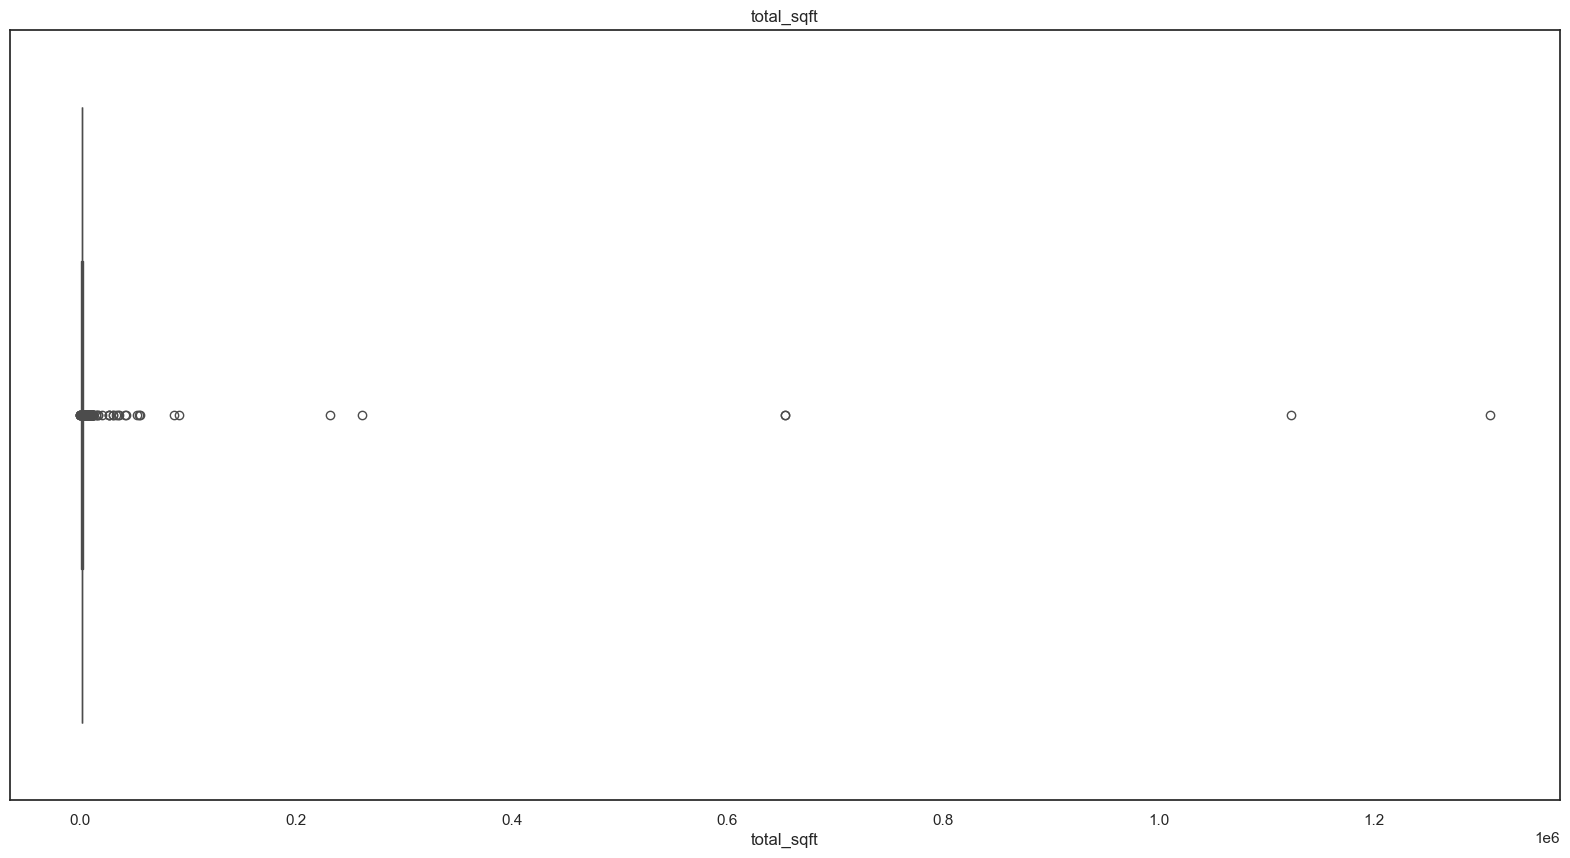

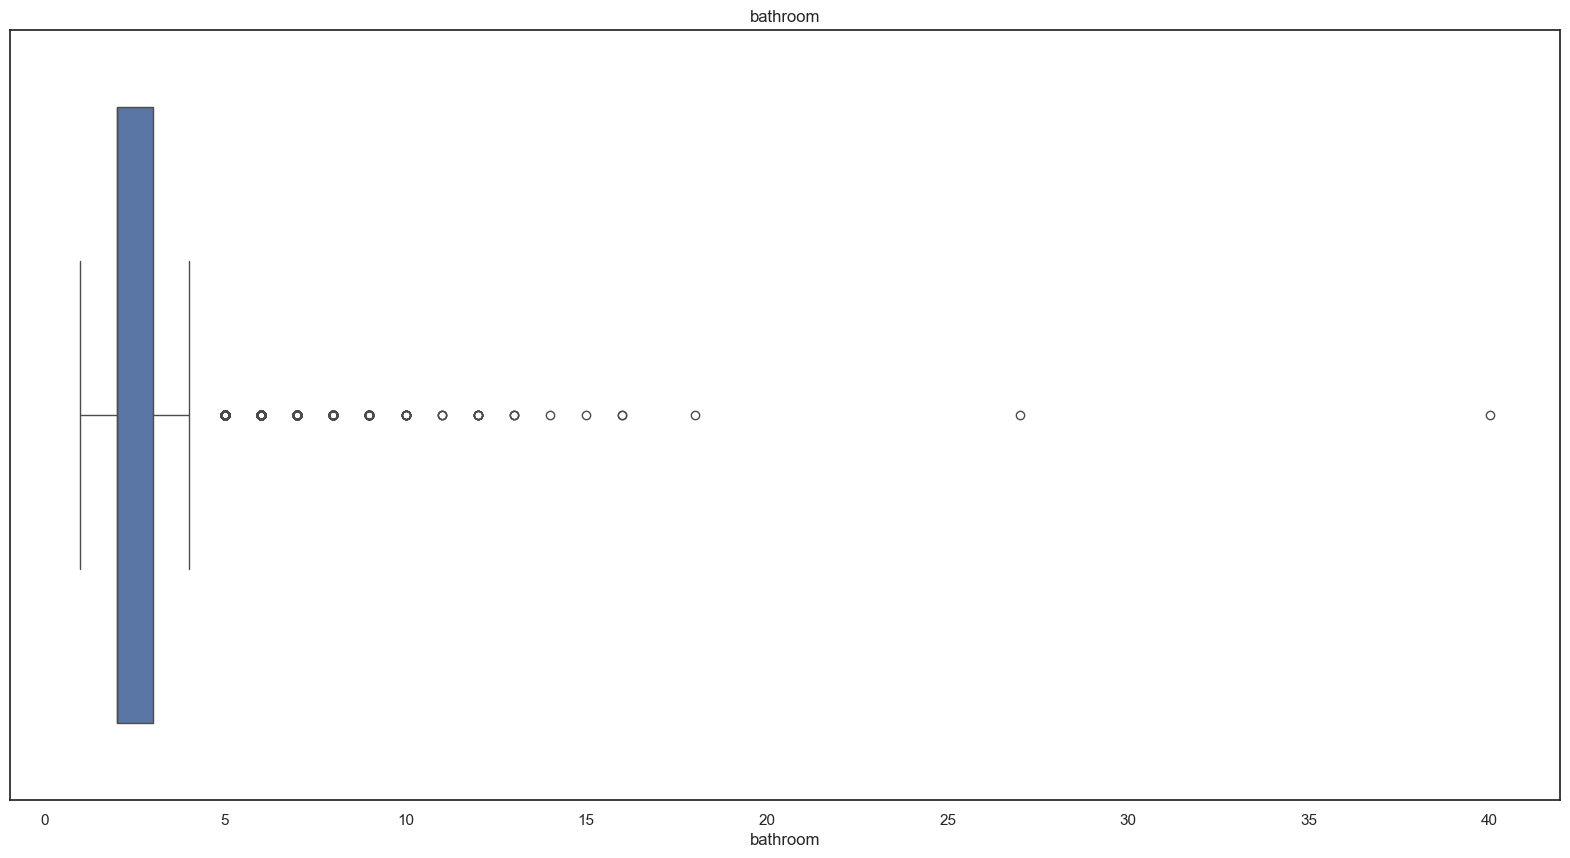

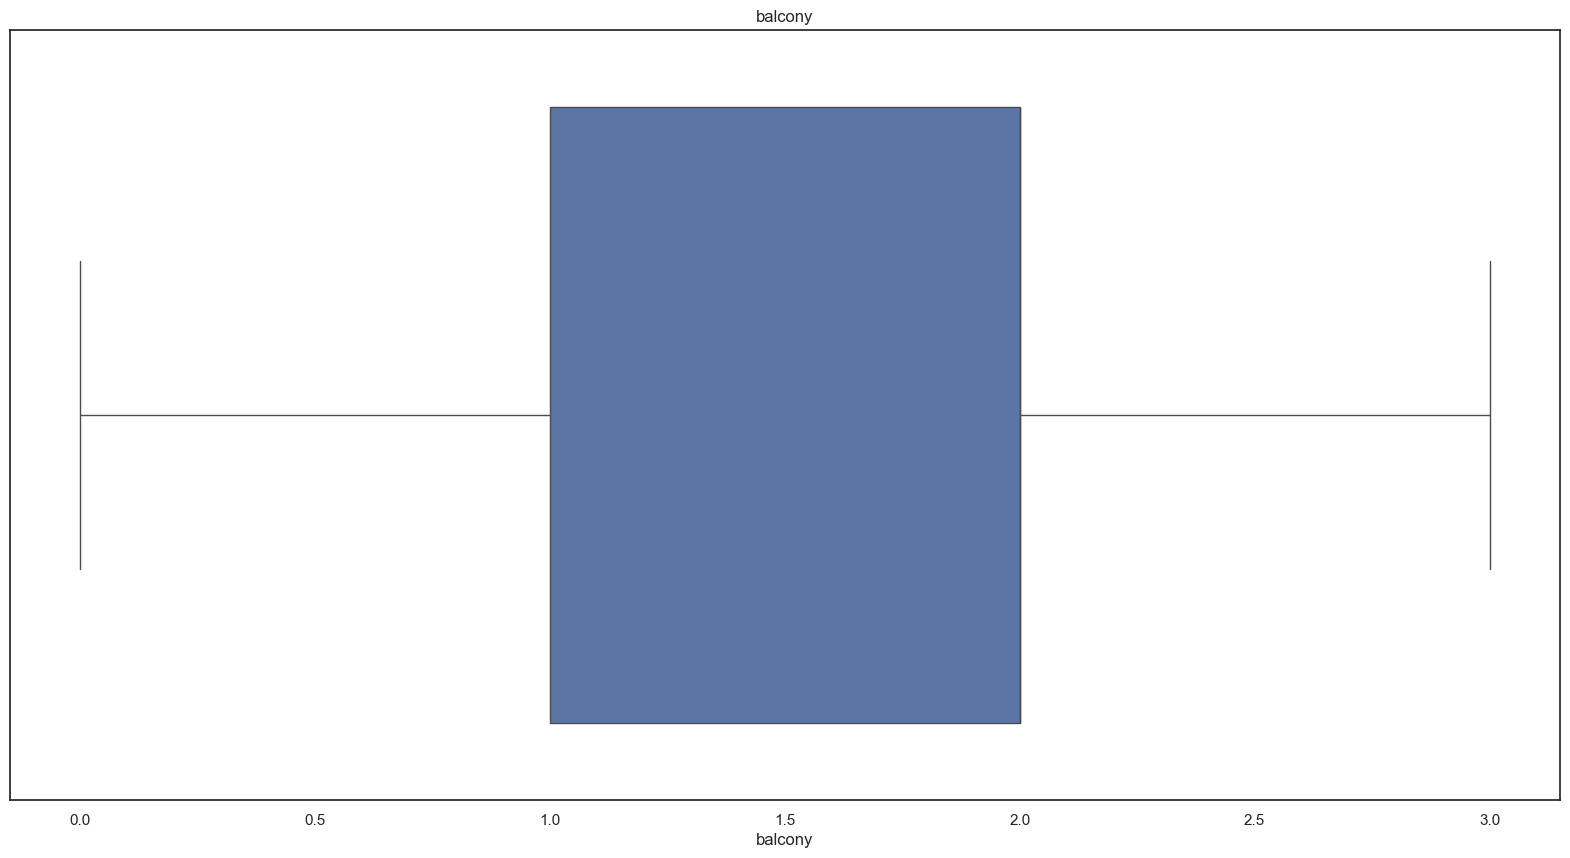

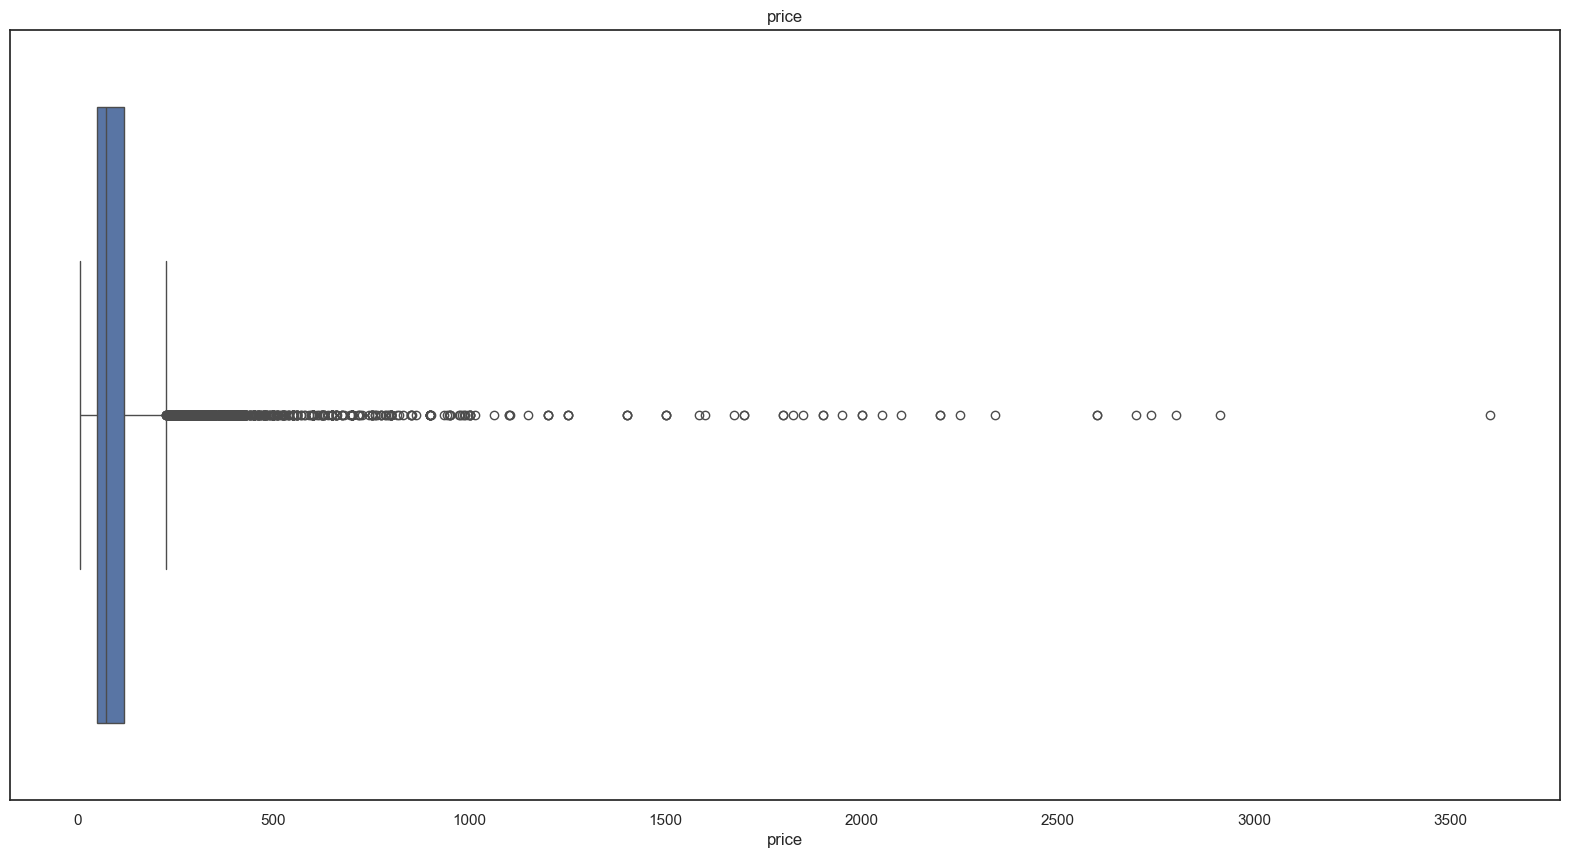

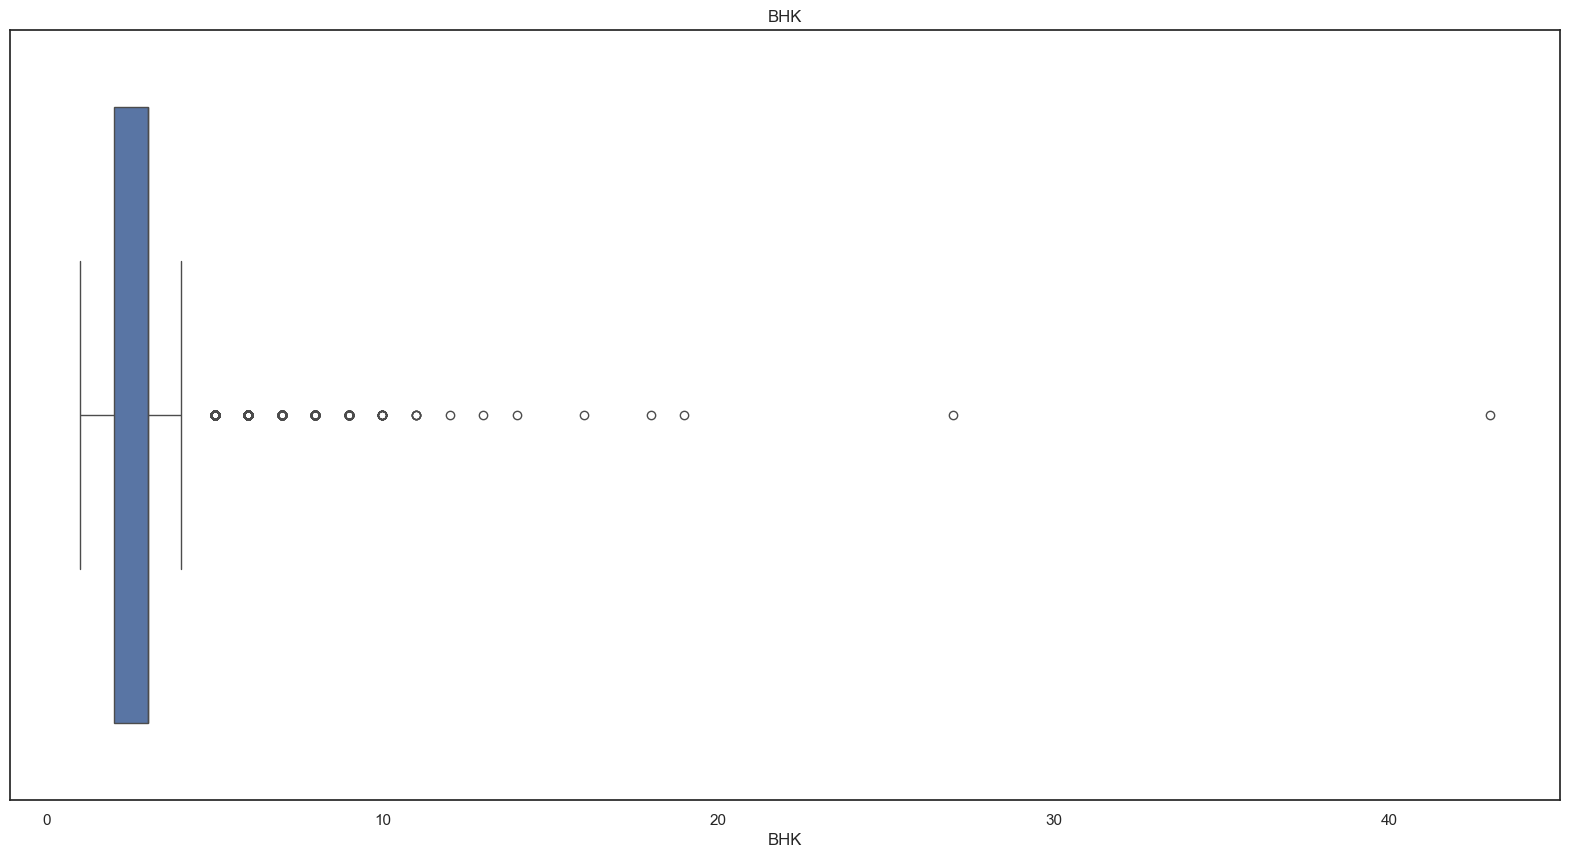

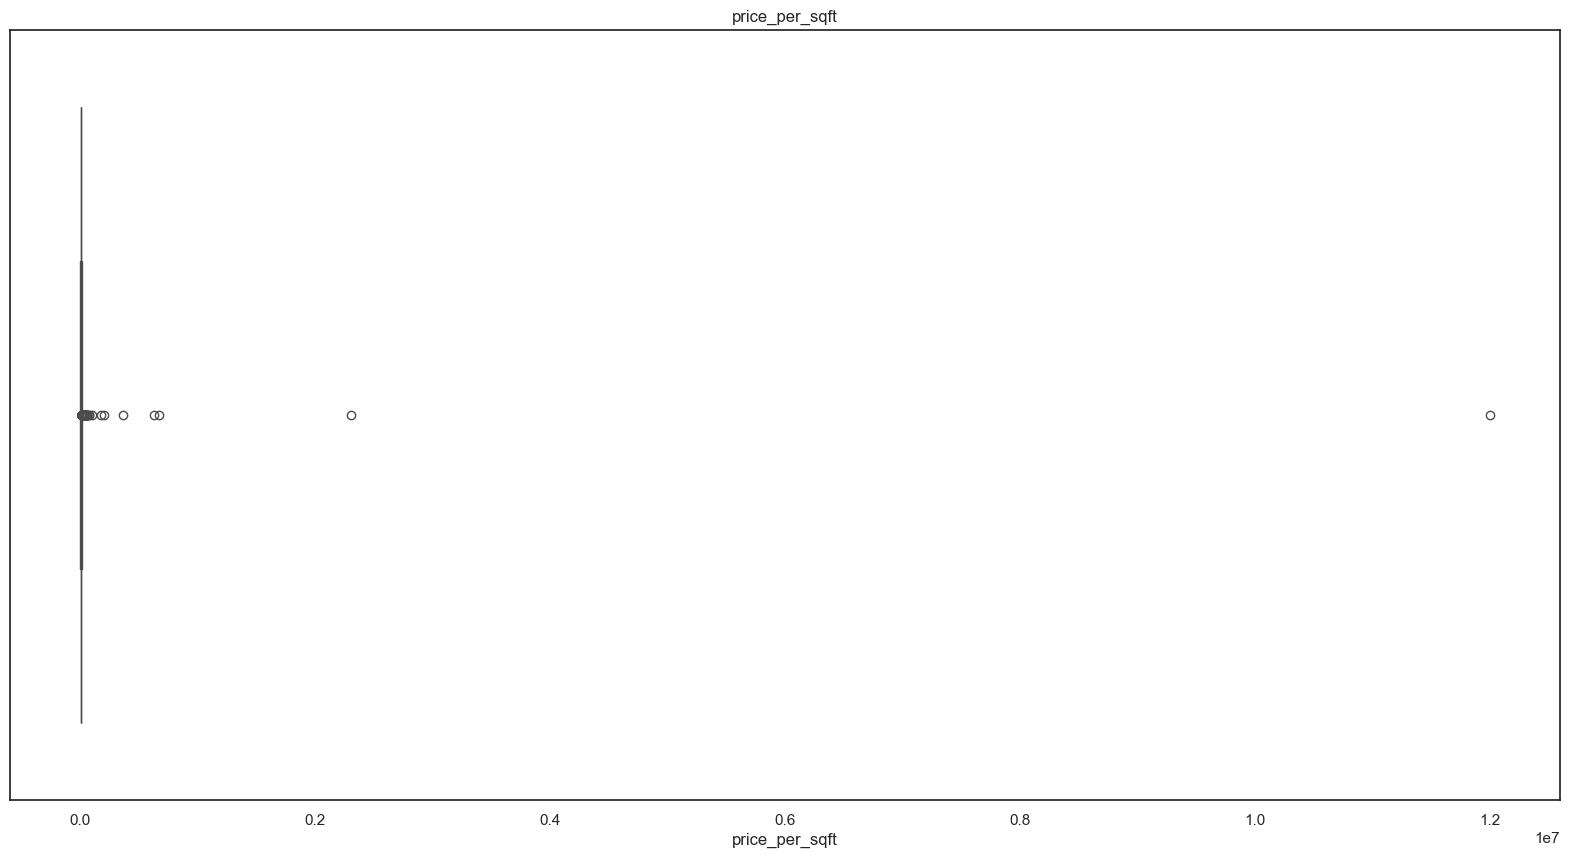

In [185]:
for i in Data_frame_numeric.columns:
    sns.boxplot(x=i, data=Data_frame_numeric)
    plt.title(i)
    plt.show()

#### 🔹 Fixing Type 1 and Type 2 Outliers

Certain features in the dataset contain outliers that need to be addressed to improve model accuracy and reliability.

The following columns show noticeable anomalies:

* **`total_sqft`**
* **`bathroom`**
* **`price`**
* **`BHK`**
* **`price_per_sqft`**

We will apply appropriate statistical techniques and domain knowledge to identify and remove or correct these outliers.


#### total_sqft 

In [186]:
Data_frame['total_sqft'].describe()

count     13246.00
mean       1909.30
std       17324.67
min           1.00
25%        1100.00
50%        1275.00
75%        1678.75
max     1306801.20
Name: total_sqft, dtype: float64

##### Max total_sqft is really high, not in general range, Which again tells us about the presence of outliers 

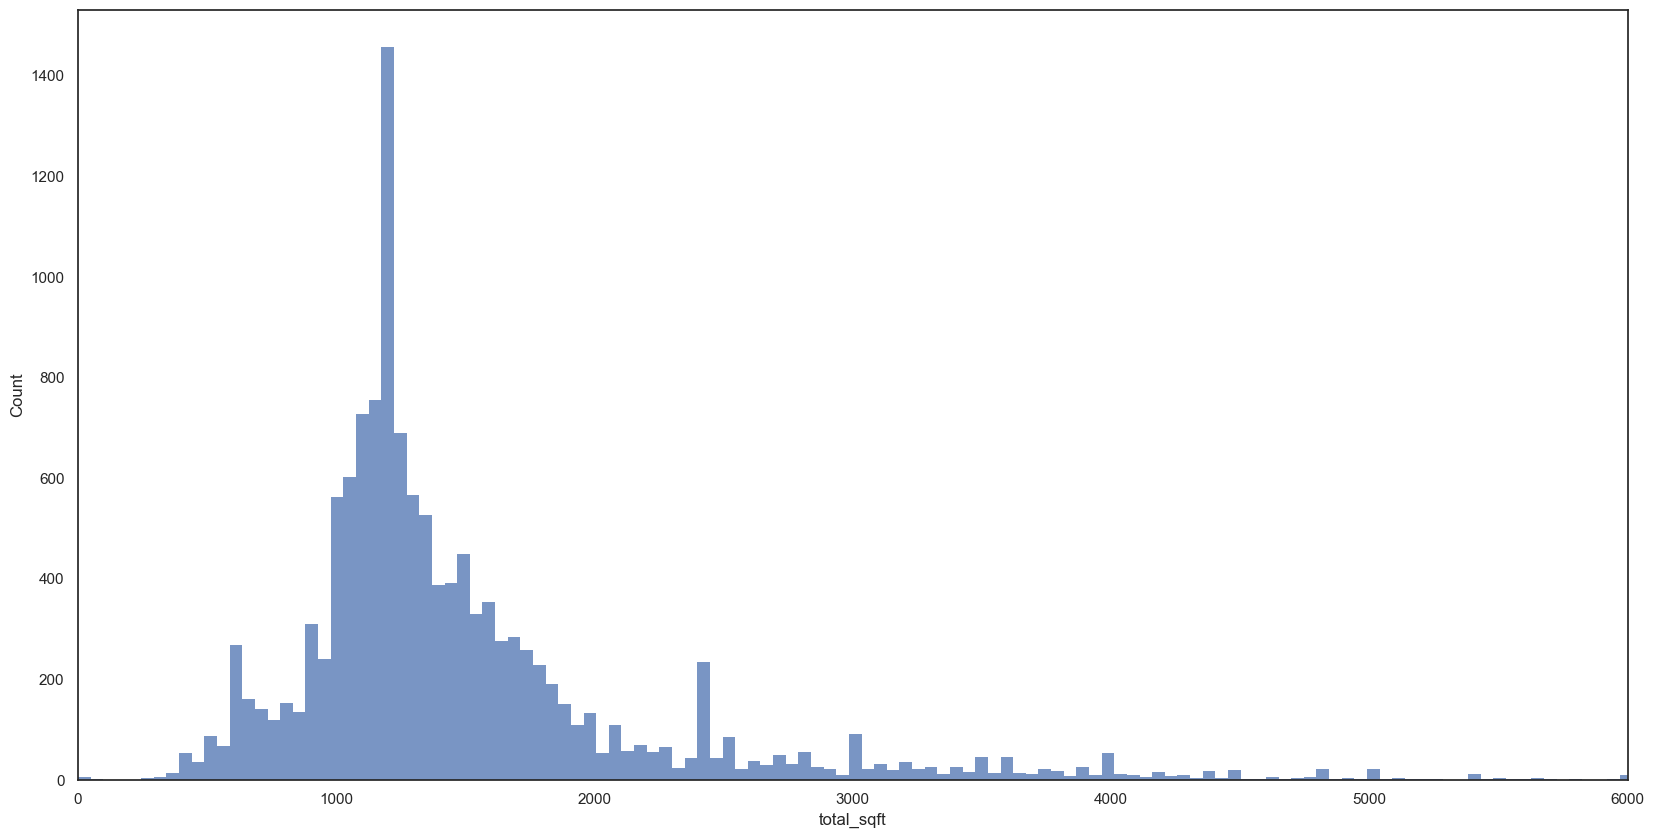

In [187]:
# total_sqft -> Treating outliers using Flooring and Capping
sns.histplot(x='total_sqft', data=Data_frame)
plt.xlim([0, 6000])
plt.show()

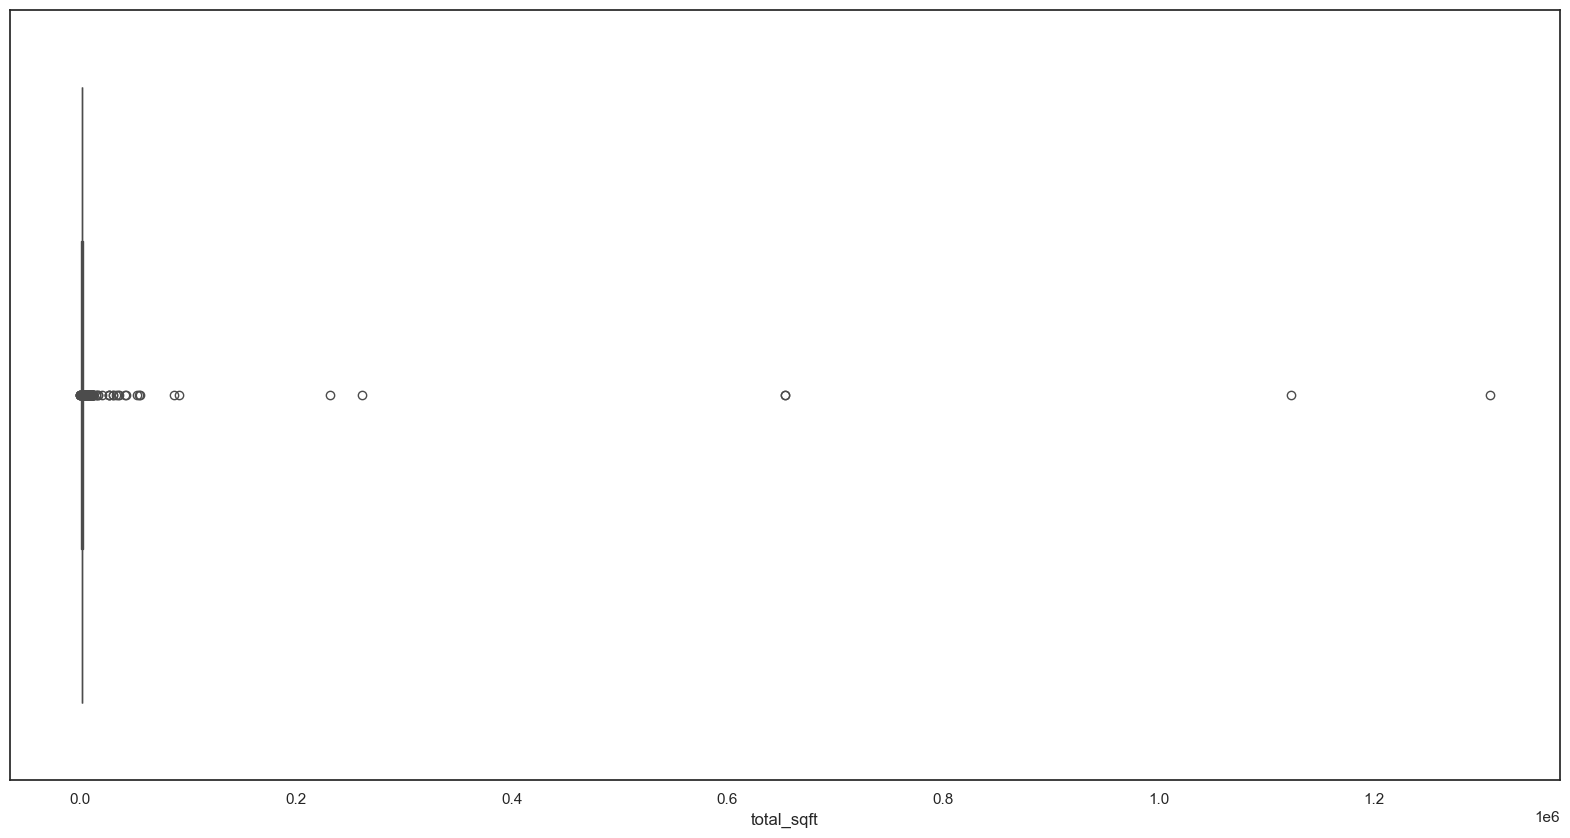

In [188]:
sns.boxplot(x='total_sqft', data=Data_frame)
plt.show()

In [189]:
# Applying Quantile Based Flooring and capping
lower_bound = Data_frame['total_sqft'].quantile(0.10)
upper_bound = Data_frame['total_sqft'].quantile(0.90)
Data_frame['total_sqft'] = np.where(Data_frame['total_sqft'] < lower_bound, lower_bound, Data_frame['total_sqft'])
Data_frame['total_sqft'] = np.where(Data_frame['total_sqft'] > upper_bound, upper_bound, Data_frame['total_sqft'])

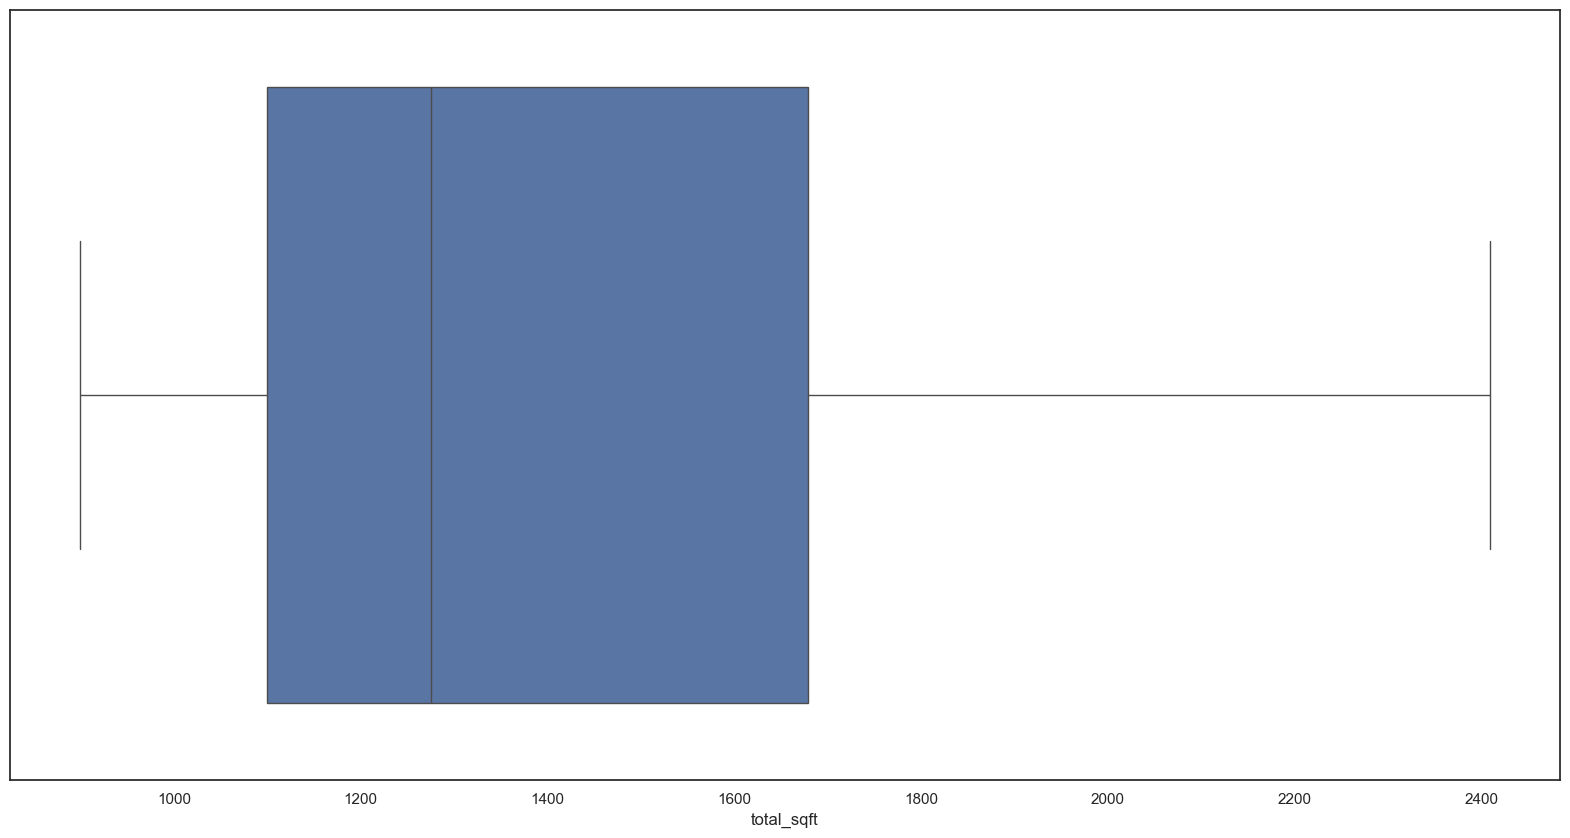

In [190]:
sns.boxplot(x='total_sqft', data=Data_frame)
plt.show()

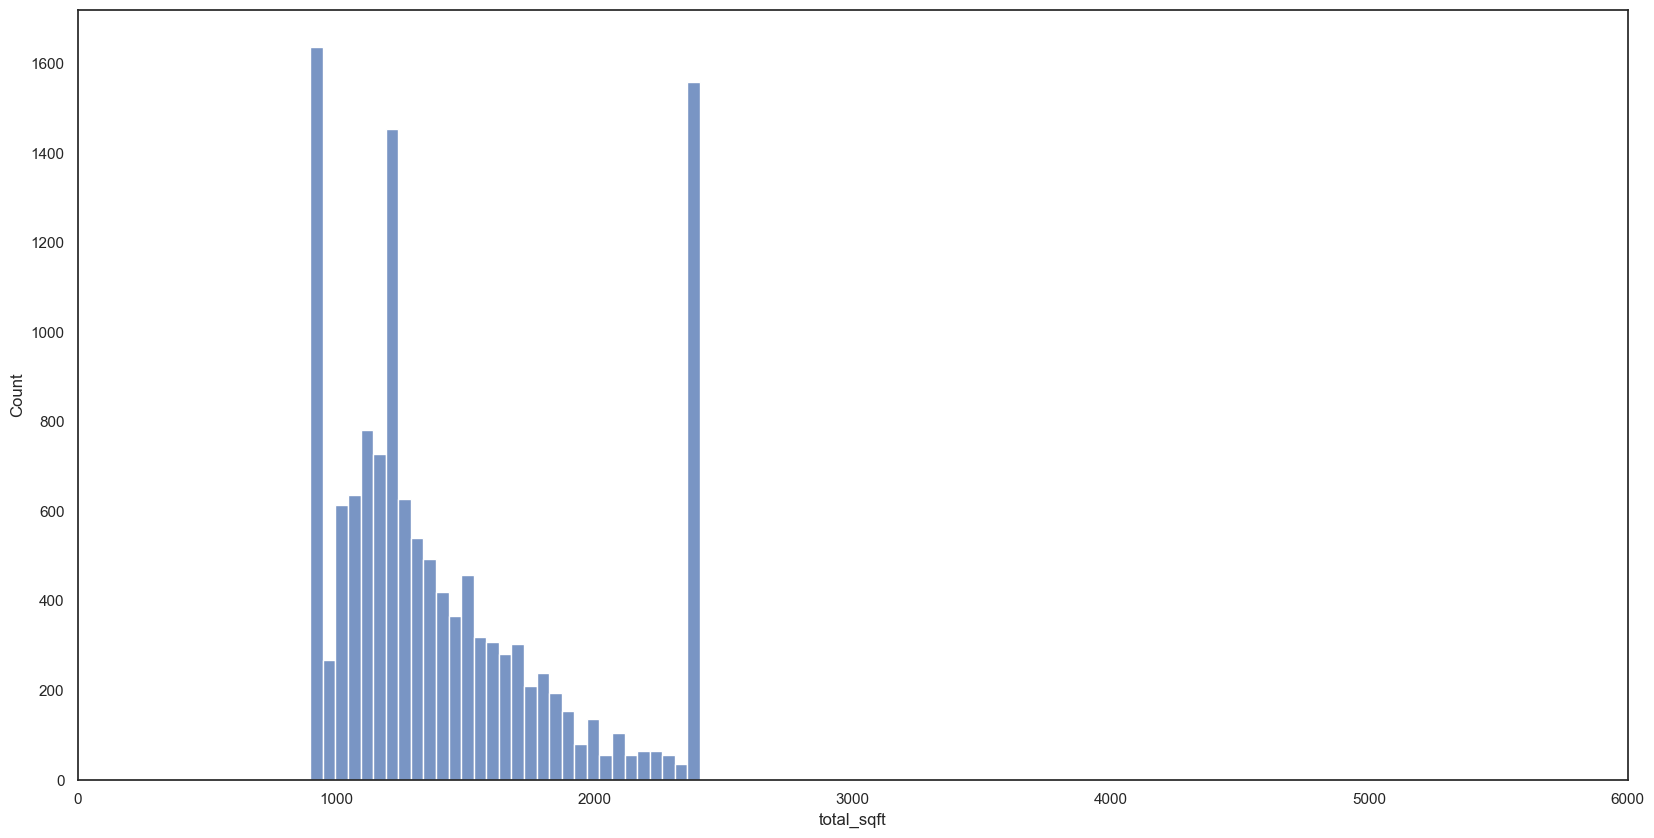

In [191]:
sns.histplot(x='total_sqft', data=Data_frame)
plt.xlim([0, 6000])
plt.show()

In [192]:
Data_frame['total_sqft'].describe()

count   13246.00
mean     1438.37
std       467.90
min       900.00
25%      1100.00
50%      1275.00
75%      1678.75
max      2408.50
Name: total_sqft, dtype: float64

#### bathroom

In [193]:
Data_frame['bathroom'].describe()

count   13246.00
mean        2.69
std         1.34
min         1.00
25%         2.00
50%         2.00
75%         3.00
max        40.00
Name: bathroom, dtype: float64

##### 40 bathrooms seems a lot for any general case, again it tells us about the presence of outliers 

In [194]:
# Bathroom - small quanitites of Outliers so Replace them with median 
median = Data_frame['bathroom'].quantile(0.50)
upper_out = Data_frame['bathroom'].quantile(0.95)
Data_frame['bathroom'] = np.where(Data_frame['bathroom'] > upper_out, median, Data_frame['bathroom'])

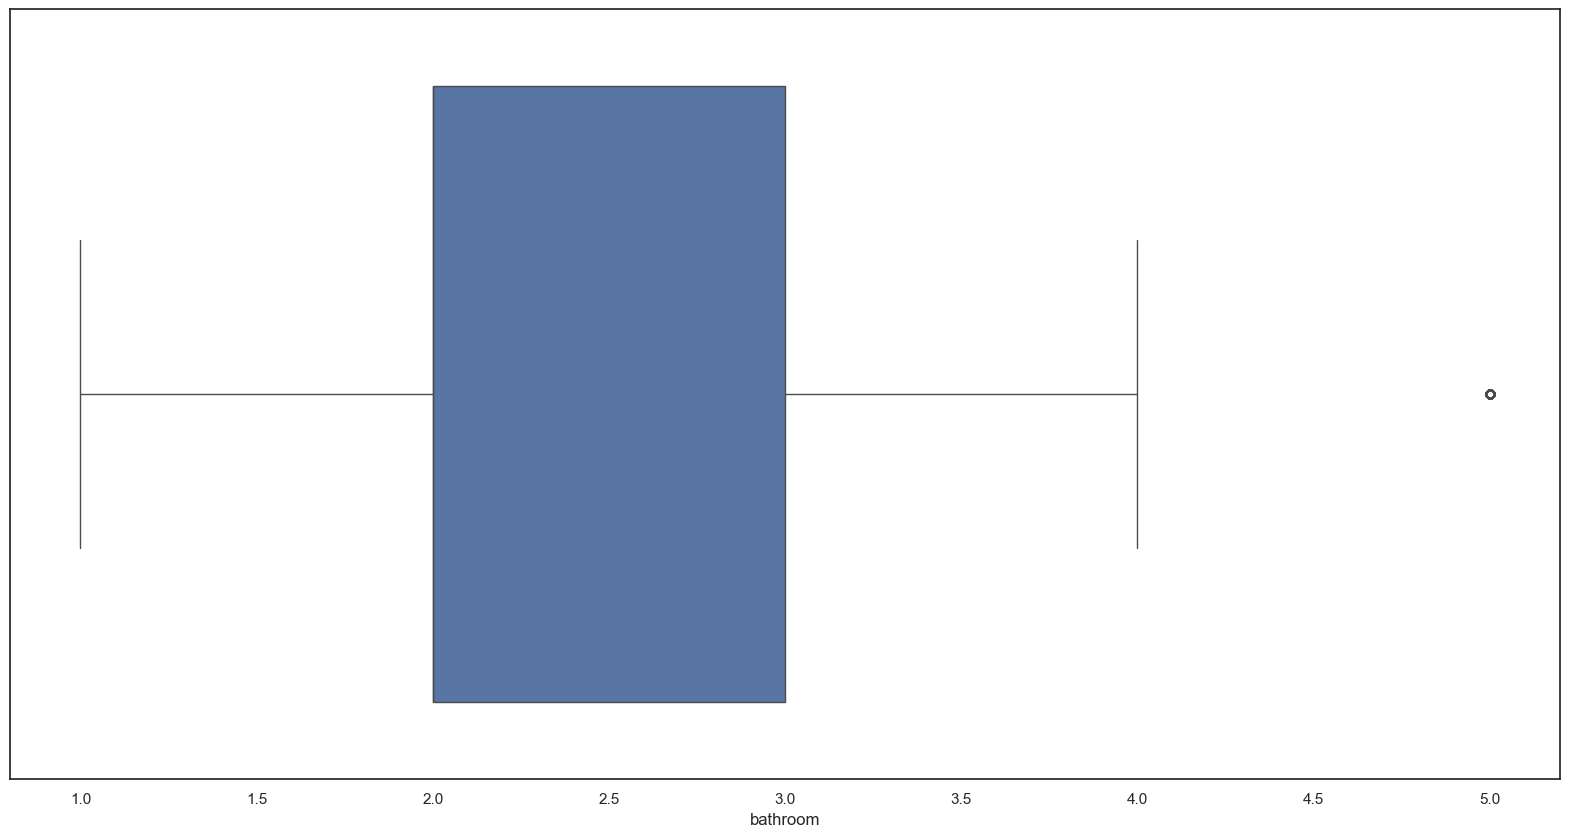

In [195]:
sns.boxplot(x='bathroom', data=Data_frame)
plt.show()

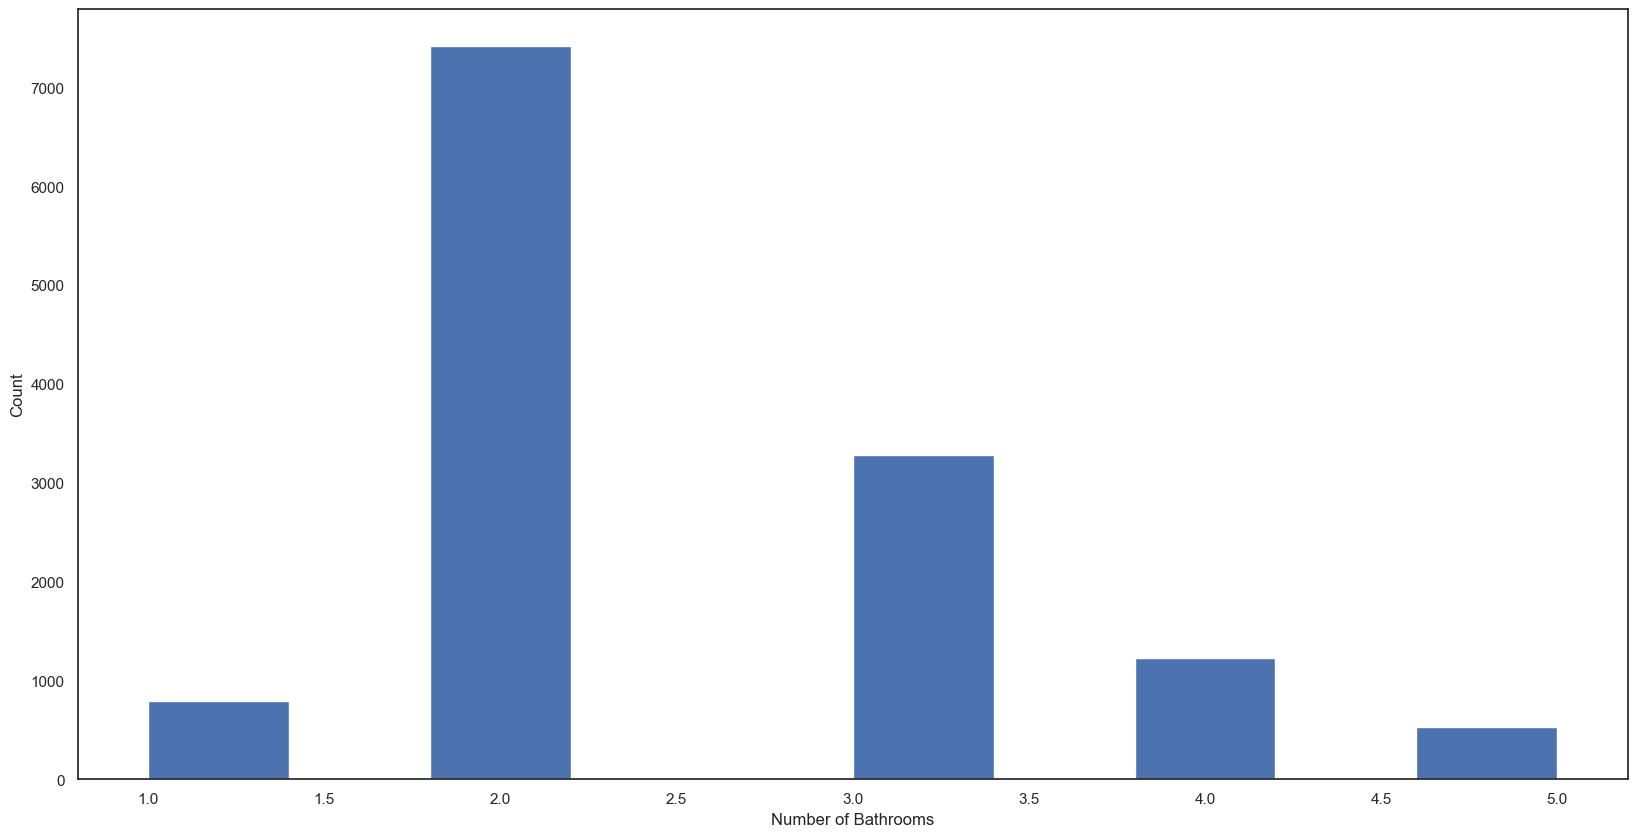

In [196]:
plt.hist(Data_frame['bathroom'])
plt.xlabel("Number of Bathrooms")
plt.ylabel("Count")
plt.show()

In [197]:
Data_frame['bathroom'].describe()

count   13246.00
mean        2.49
std         0.89
min         1.00
25%         2.00
50%         2.00
75%         3.00
max         5.00
Name: bathroom, dtype: float64

#### price

In [198]:
Data_frame['price'].describe()

count   13246.00
mean      112.39
std       149.08
min         8.00
25%        50.00
50%        72.00
75%       120.00
max      3600.00
Name: price, dtype: float64

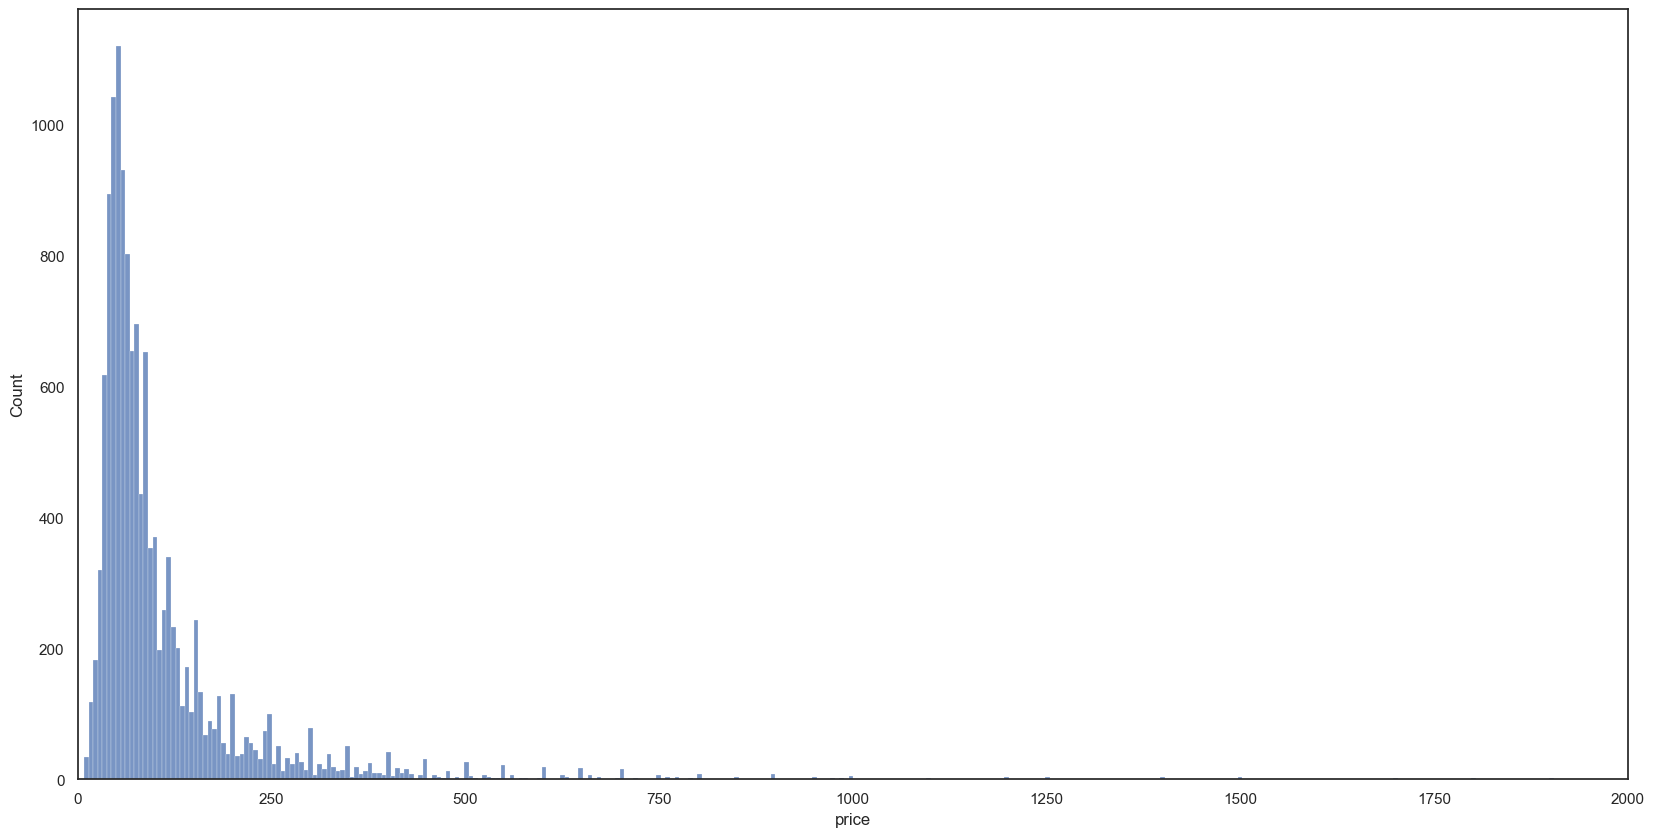

In [199]:
# price -> Treating outliers using Flooring and Capping
sns.histplot(x='price', data=Data_frame)
plt.xlim([0, 2000])
plt.show()

In [200]:
# Applying Quantile Based Flooring and capping
lower_bound = Data_frame['price'].quantile(0.10)
upper_bound = Data_frame['price'].quantile(0.90)
Data_frame['price'] = np.where(Data_frame['price'] < lower_bound, lower_bound, Data_frame['price'])
Data_frame['price'] = np.where(Data_frame['price'] > upper_bound, upper_bound, Data_frame['price'])

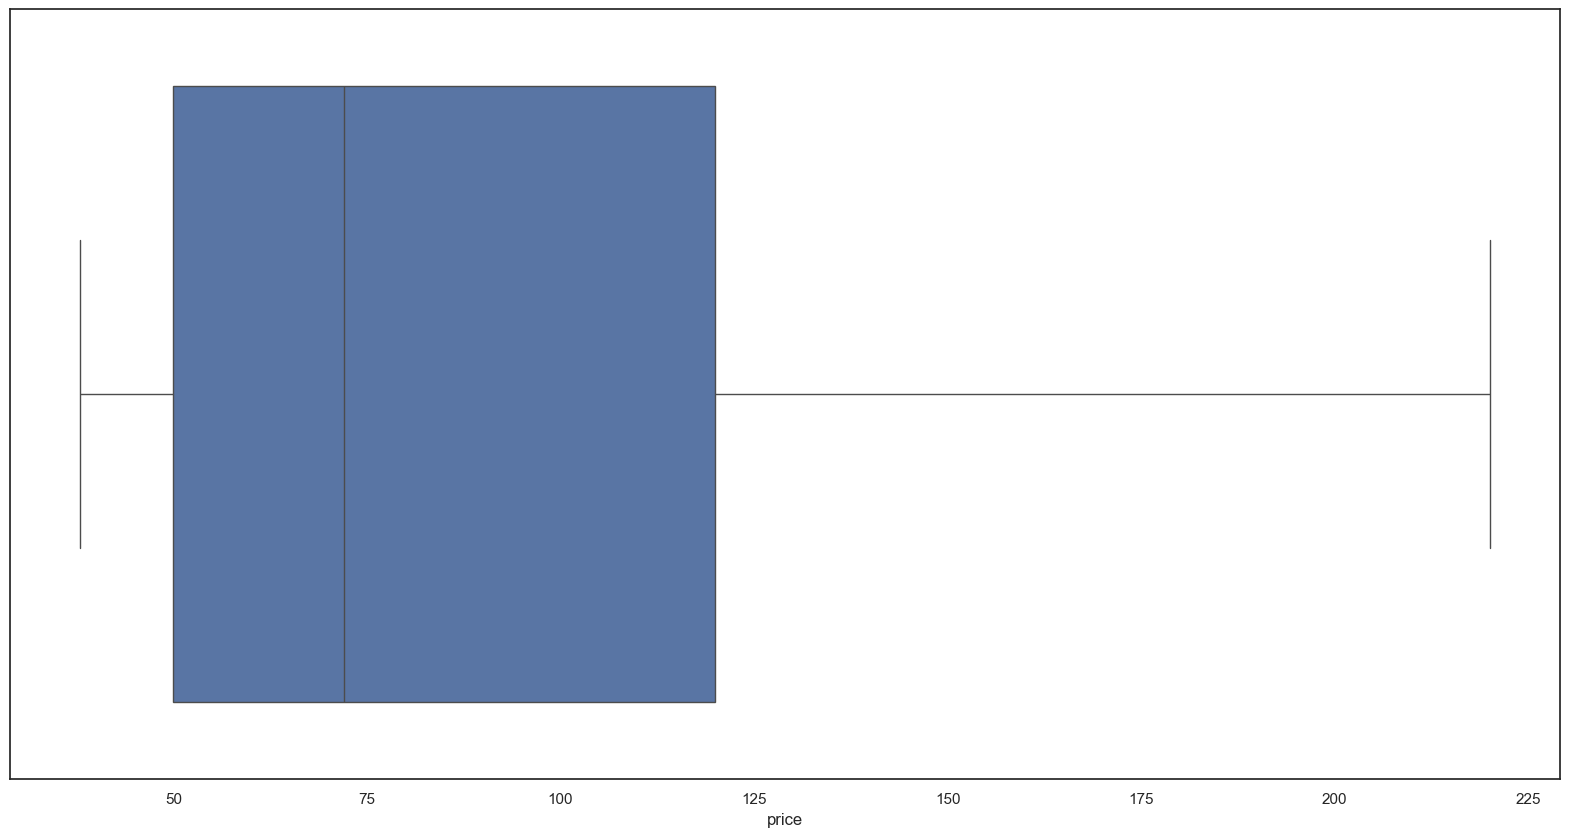

In [201]:
sns.boxplot(x='price', data=Data_frame)
plt.show()

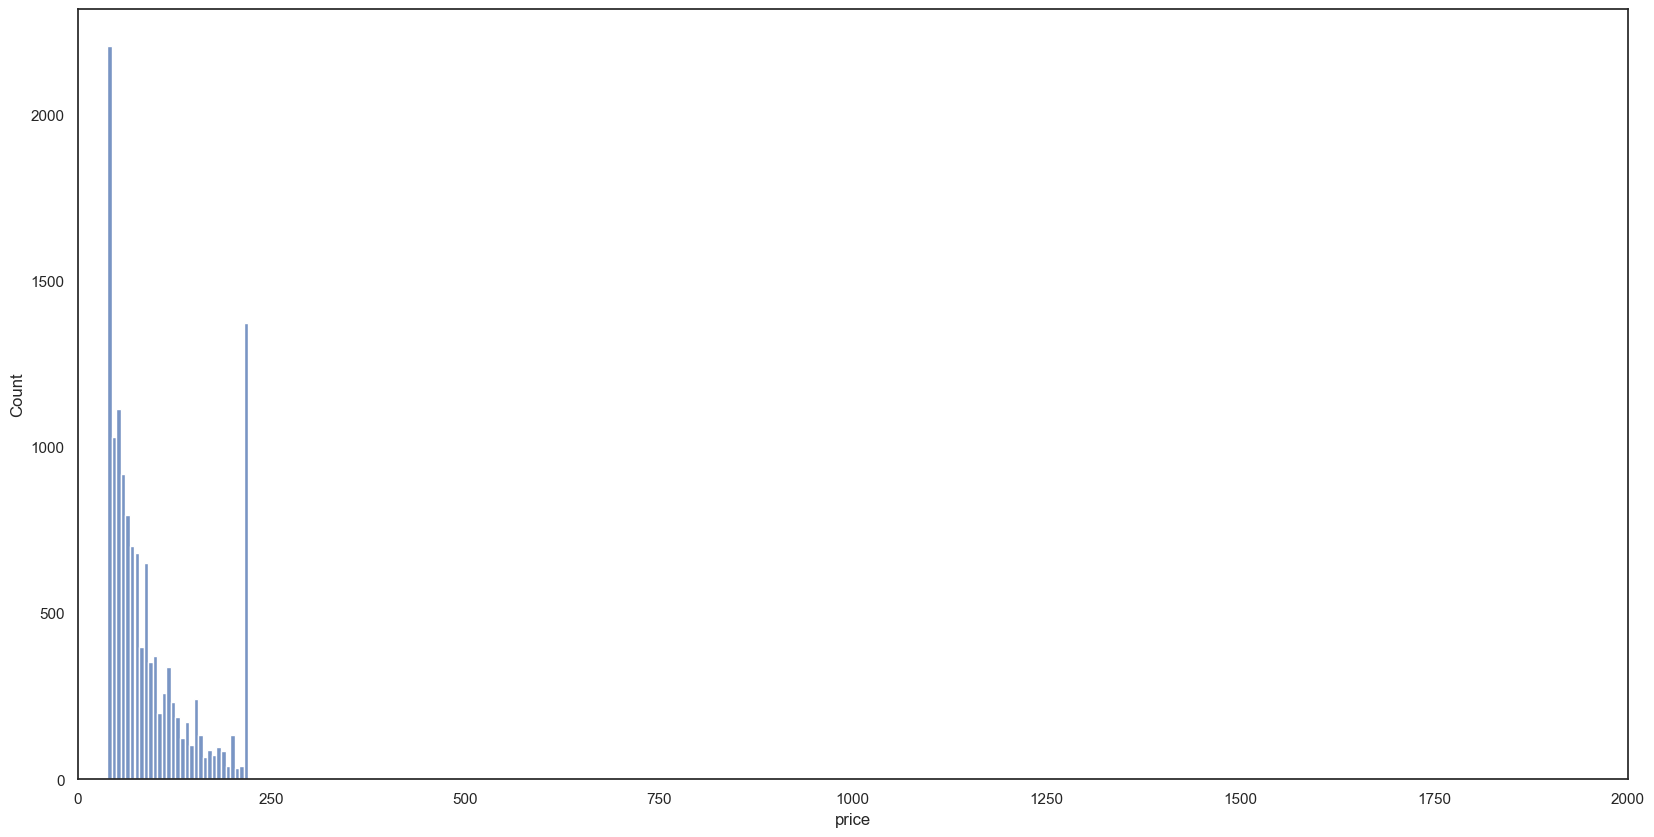

In [202]:
sns.histplot(x='price', data=Data_frame)
plt.xlim([0, 2000])
plt.show()

In [203]:
Data_frame['price'].describe()

count   13246.00
mean       93.54
std        57.58
min        38.00
25%        50.00
50%        72.00
75%       120.00
max       220.00
Name: price, dtype: float64

#### BHK

In [204]:
Data_frame['BHK'].describe()

count   13246.00
mean        2.80
std         1.30
min         1.00
25%         2.00
50%         3.00
75%         3.00
max        43.00
Name: BHK, dtype: float64

##### 43 bedrooms for a house/real estate property is a lot for any general case, again tells us about the presence of outliers

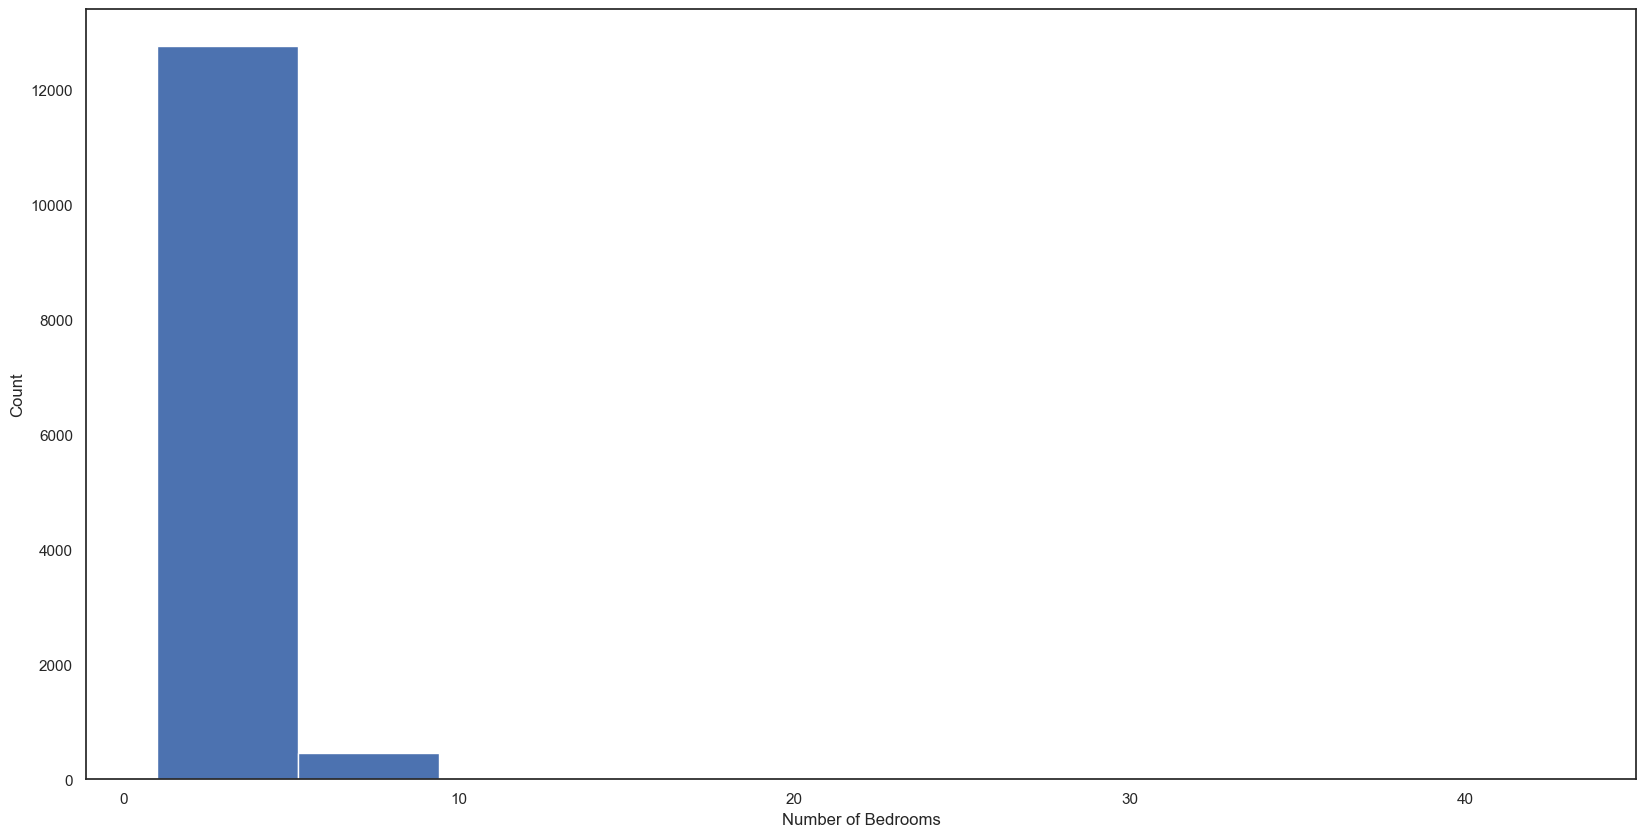

In [205]:
plt.hist(Data_frame['BHK'])
plt.xlabel("Number of Bedrooms")
plt.ylabel("Count")
plt.show()

In [206]:
# BHK - small quanitites of Outliers so Replace them with median 
median = Data_frame['BHK'].quantile(0.50)
upper_out = Data_frame['BHK'].quantile(0.98)
Data_frame['BHK'] = np.where(Data_frame['BHK'] > upper_out, median, Data_frame['BHK'])

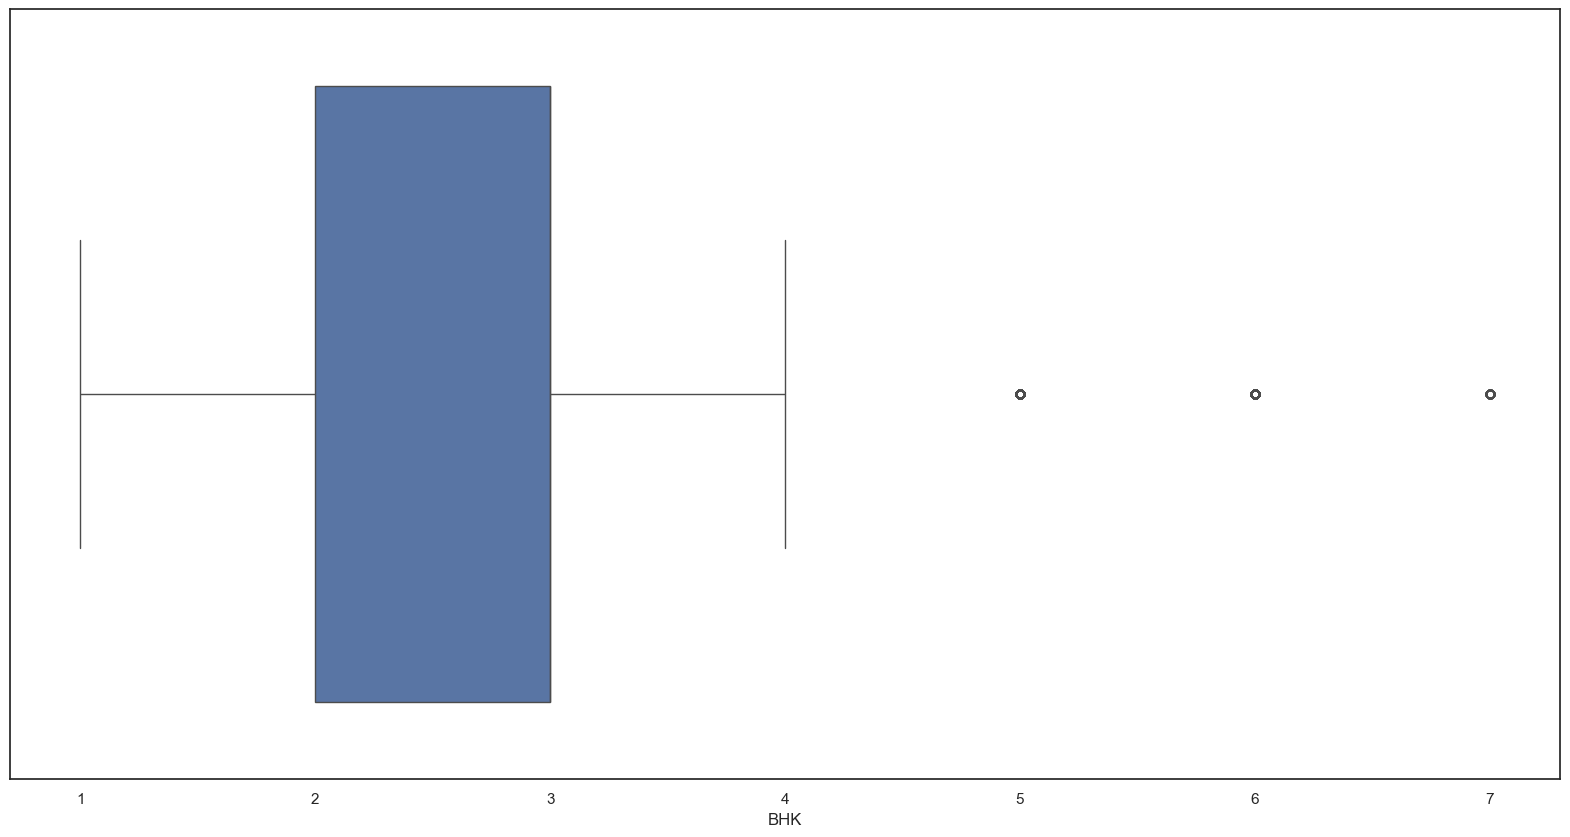

In [207]:
sns.boxplot(x='BHK', data=Data_frame)
plt.show()

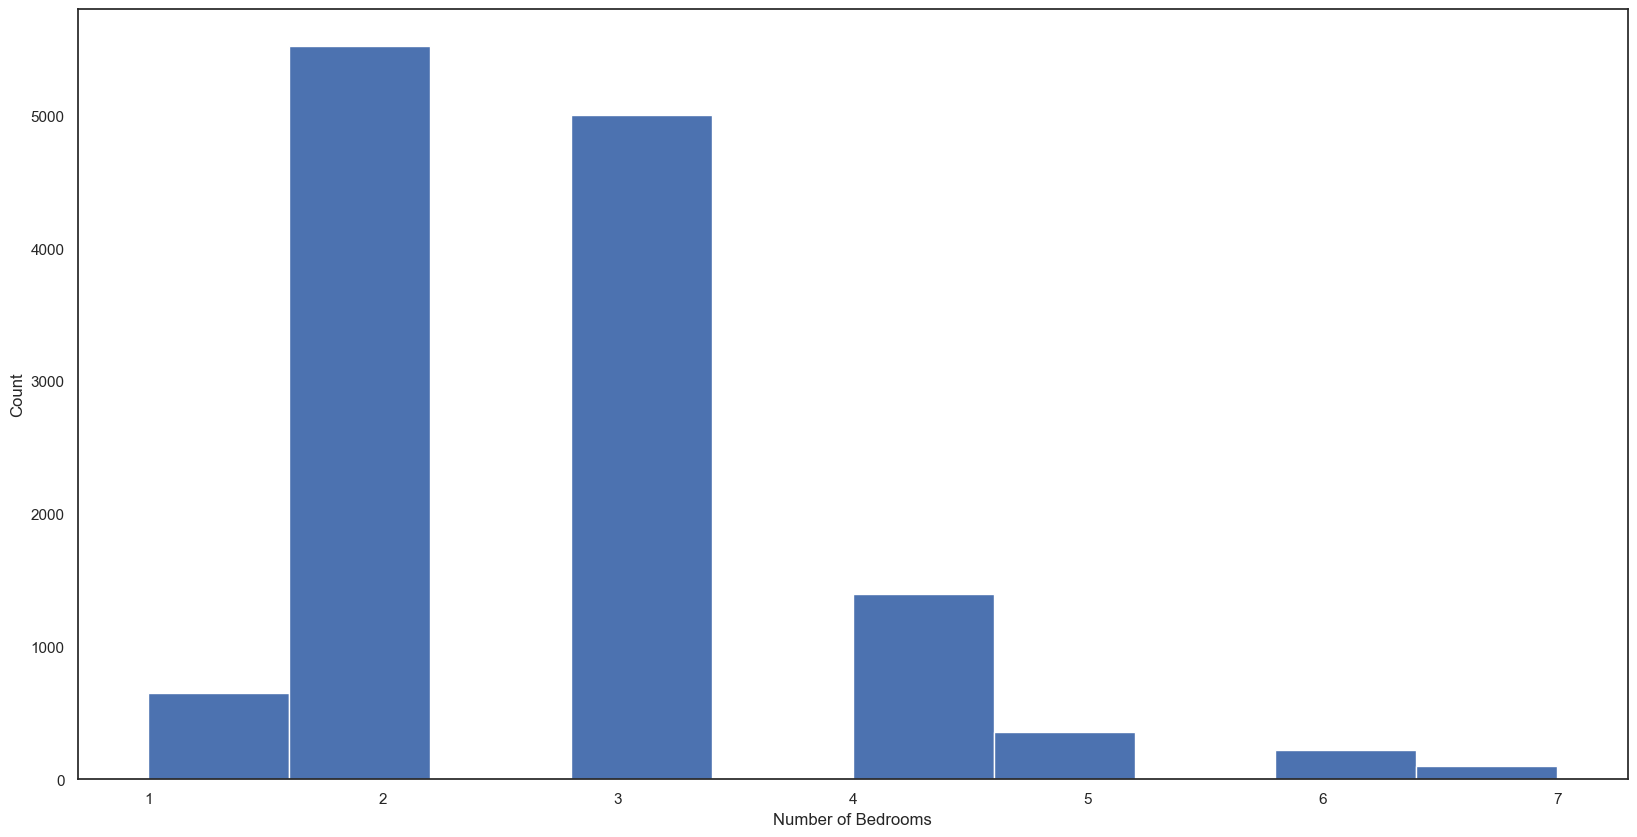

In [208]:
plt.hist(Data_frame['BHK'])
plt.xlabel("Number of Bedrooms")
plt.ylabel("Count")
plt.show()

In [209]:
Data_frame['BHK'].describe()

count   13246.00
mean        2.72
std         1.01
min         1.00
25%         2.00
50%         3.00
75%         3.00
max         7.00
Name: BHK, dtype: float64

In [210]:
Data_frame.head(10)

,area_type,total_sqft,bathroom,balcony,price,site_location,BHK,price_per_sqft
0,Super built-up Area,1056.00,2.00,1.00,39.07,Alandi Road,2.00,3699.81
1,Plot Area,2408.50,5.00,3.00,120.00,Ambegaon Budruk,4.00,4615.38
2,Built-up Area,1440.00,2.00,3.00,62.00,Anandnagar,3.00,4305.56
3,Super built-up Area,1521.00,3.00,1.00,95.00,Aundh,3.00,6245.89
4,Super built-up Area,1200.00,2.00,1.00,51.00,Aundh Road,2.00,4250.00
5,Super built-up Area,1170.00,2.00,1.00,38.00,Balaji Nagar,2.00,3247.86
6,Super built-up Area,2408.50,4.00,1.58,204.00,Baner,4.00,7467.06
7,Super built-up Area,2408.50,4.00,1.58,220.00,Baner road,4.00,18181.82
8,Super built-up Area,1310.00,3.00,1.00,63.25,Bhandarkar Road,3.00,4828.24
9,Plot Area,1020.00,2.00,1.58,220.00,Bhavani Peth,6.00,36274.51


#### 🔹 Type 2 Outlier: Domain-Based Rule for Bathrooms

In a typical residential property, the number of **bathrooms** is usually related to the number of **bedrooms (BHK)**.

A commonly accepted guideline is:

> **Number of Bathrooms ≤ BHK + 1**
> *(the extra one accounts for a guest or common bathroom)*

So, if a property has significantly **more bathrooms than bedrooms** (e.g., 2 or more extra bathrooms), it is likely an **anomaly** and may need to be corrected or removed from the dataset.

In [211]:
Data_frame[~(Data_frame['bathroom'] < (Data_frame['BHK'] + 2))].shape

(44, 8)

In [212]:
Data_frame[(Data_frame['bathroom'] < (Data_frame['BHK'] + 2))].shape

(13202, 8)

In [213]:
Data_frame.shape

(13246, 8)

In [214]:
Data_frame = Data_frame[(Data_frame['bathroom'] < (Data_frame['BHK'] + 2))]
Data_frame.shape

(13202, 8)

In [215]:
Data_frame['balcony'] = Data_frame['balcony'].astype('int')

In [216]:
Data_frame.head(10)

,area_type,total_sqft,bathroom,balcony,price,site_location,BHK,price_per_sqft
0,Super built-up Area,1056.00,2.00,1,39.07,Alandi Road,2.00,3699.81
1,Plot Area,2408.50,5.00,3,120.00,Ambegaon Budruk,4.00,4615.38
2,Built-up Area,1440.00,2.00,3,62.00,Anandnagar,3.00,4305.56
3,Super built-up Area,1521.00,3.00,1,95.00,Aundh,3.00,6245.89
4,Super built-up Area,1200.00,2.00,1,51.00,Aundh Road,2.00,4250.00
5,Super built-up Area,1170.00,2.00,1,38.00,Balaji Nagar,2.00,3247.86
6,Super built-up Area,2408.50,4.00,1,204.00,Baner,4.00,7467.06
7,Super built-up Area,2408.50,4.00,1,220.00,Baner road,4.00,18181.82
8,Super built-up Area,1310.00,3.00,1,63.25,Bhandarkar Road,3.00,4828.24
9,Plot Area,1020.00,2.00,1,220.00,Bhavani Peth,6.00,36274.51


##### price_per_sqft

In [217]:
Data_frame['price_per_sqft'].describe()

count      13202.00
mean        7906.02
std       106722.03
min            2.26
25%         4259.26
50%         5420.87
75%         7298.74
max     12000000.00
Name: price_per_sqft, dtype: float64

##### Here we find that min price per sqft is 2.25 whereas max is 1.2e+07, this shows a wide variation in property prices.

In [218]:
# Applying Quantile Based Flooring and capping
lower_bound = Data_frame['price_per_sqft'].quantile(0.10)
upper_bound = Data_frame['price_per_sqft'].quantile(0.90)
Data_frame['price_per_sqft'] = np.where(Data_frame['price_per_sqft'] < lower_bound, lower_bound, Data_frame['price_per_sqft'])
Data_frame['price_per_sqft'] = np.where(Data_frame['price_per_sqft'] > upper_bound, upper_bound, Data_frame['price_per_sqft'])

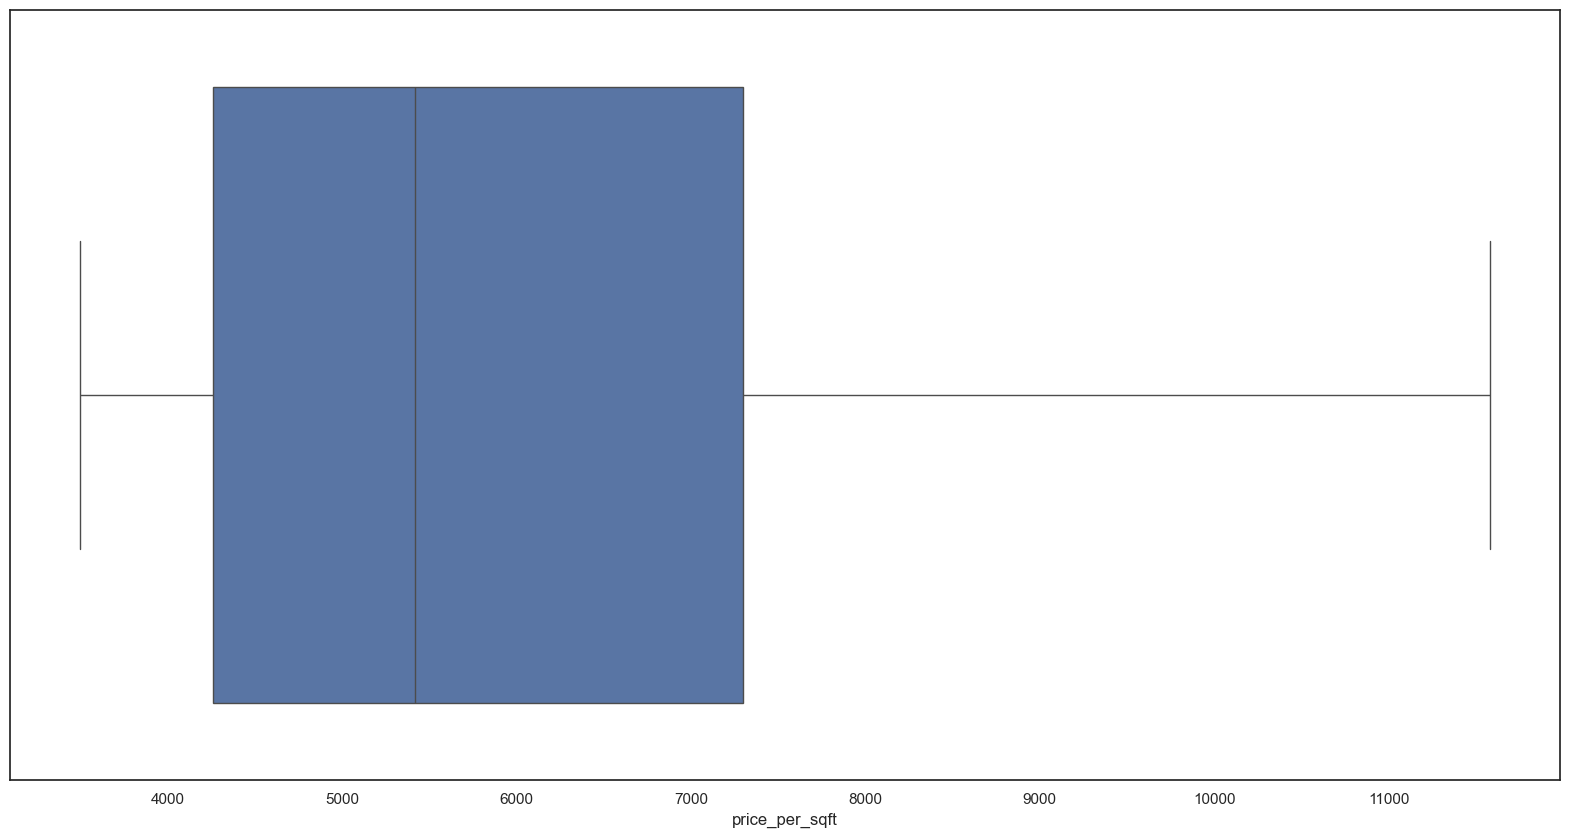

In [219]:
sns.boxplot(x='price_per_sqft', data=Data_frame)
plt.show()

In [220]:
Data_frame['price_per_sqft'].describe()

count   13202.00
mean     6186.04
std      2504.83
min      3500.00
25%      4259.26
50%      5420.87
75%      7298.74
max     11578.86
Name: price_per_sqft, dtype: float64

#### 🔹 Type 2 Outlier: Inconsistent Pricing Based on BHK

In some cases, we observe that the **price of a 2 BHK** property is **higher than that of a 3 BHK** within the **same location** and having a **similar total area (sqft)**.

This is **unusual and inconsistent** with general market trends — as more spacious properties (like 3 BHK) typically command higher prices.

Such inconsistencies likely indicate **domain-level outliers** or **data entry errors**, and should be flagged or removed to maintain the reliability of the model.


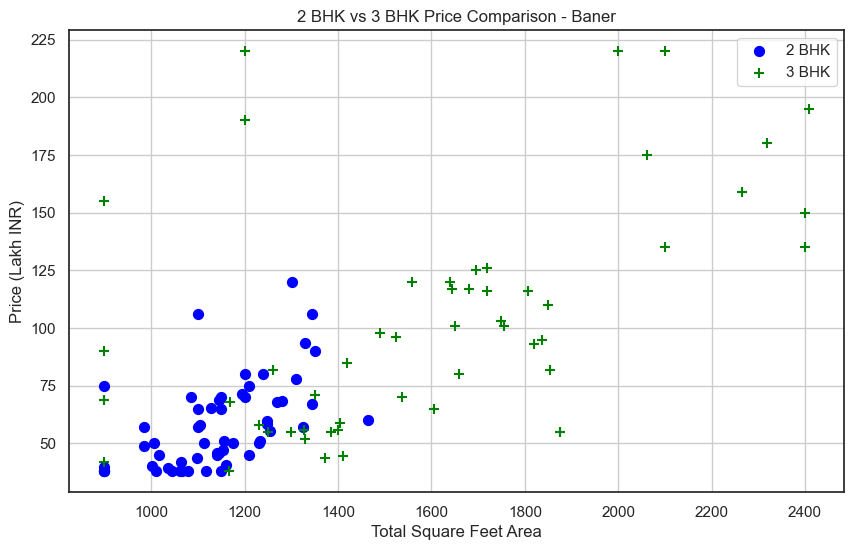

In [223]:
# Function to plot scatter plot of 2 BHK vs 3 BHK prices for a given location
def plot_bhk_price_comparison(df, location):
    df_2bhk = df[(df['site_location'] == location) & (df['BHK'] == 2)]
    df_3bhk = df[(df['site_location'] == location) & (df['BHK'] == 3)]

    plt.figure(figsize=(10, 6))
    plt.scatter(df_2bhk['total_sqft'], df_2bhk['price'], color='blue', label='2 BHK', s=50)
    plt.scatter(df_3bhk['total_sqft'], df_3bhk['price'], color='green', marker='+', label='3 BHK', s=50)
    
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh INR)")
    plt.title(f"2 BHK vs 3 BHK Price Comparison - {location}")
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
plot_bhk_price_comparison(Data_frame, "Baner")


#### 🔹 Identifying and Removing Price-Based Outliers by BHK

In certain cases, we observe that **2 BHK properties are priced higher than 3 BHK properties** within the **same location** and with **similar total area (sqft)**.

This implies that the **price per sqft of 2 BHK** homes is **higher** than that of 3 BHK homes in the same area — which is **unusual** and likely indicates inconsistent or incorrect pricing data.

##### ✅ Solution:

To handle this:

* For each **location**, we will calculate the **mean price per sqft** of **2 BHK** properties.
* Then, we will **remove 3 BHK properties** whose **price per sqft** is **lower than the mean price per sqft of 2 BHK** in that same location and similar size range.

> 🔍 This comparison is done **within the same location** to ensure fairness, as location has a significant impact on property prices.



Updated Data Shape: (7226, 8)


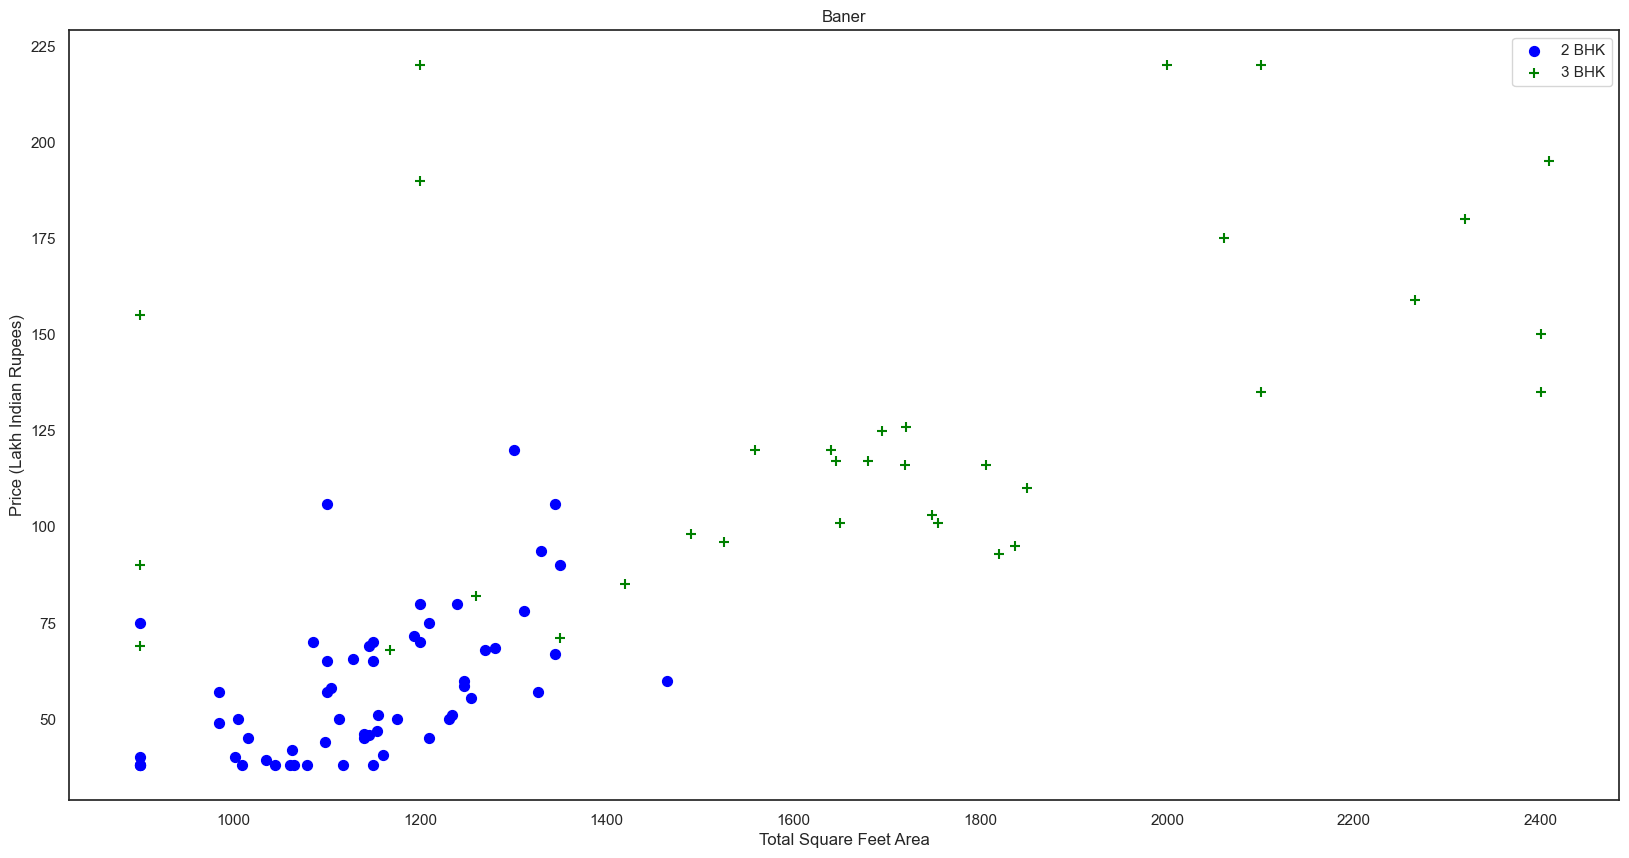

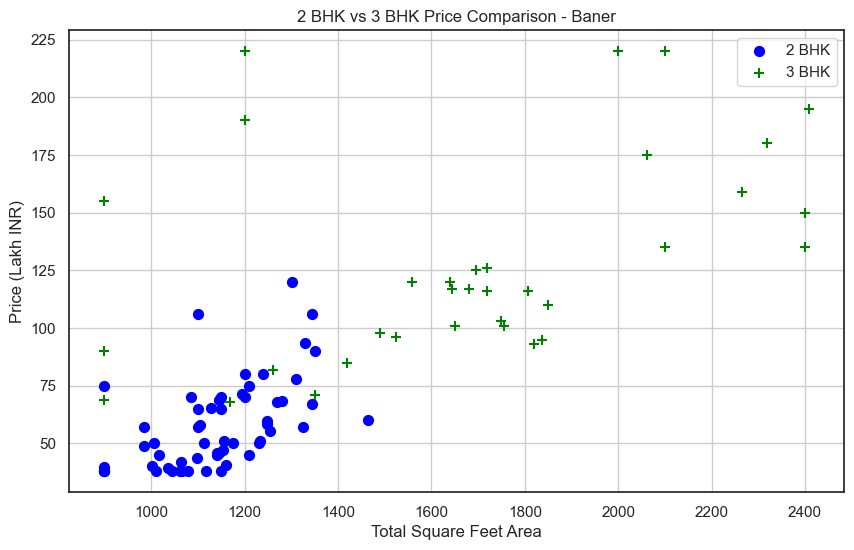

In [226]:
def remove_bhk_outliers(df):
    df_out = pd.DataFrame()
    
    for location, location_df in df.groupby('site_location'):
        bhk_stats = {}
        
        # Compute mean price_per_sqft for each BHK in this location
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': bhk_df['price_per_sqft'].mean(),
                'count': bhk_df.shape[0]
            }

        # Filter out BHKs where price_per_sqft < mean of (bhk-1)
        for bhk, bhk_df in location_df.groupby('BHK'):
            if bhk - 1 in bhk_stats and bhk_stats[bhk - 1]['count'] > 5:
                df_filtered = bhk_df[bhk_df['price_per_sqft'] >= bhk_stats[bhk - 1]['mean']]
                df_out = pd.concat([df_out, df_filtered], ignore_index=True)
            else:
                df_out = pd.concat([df_out, bhk_df], ignore_index=True)
    
    return df_out

# Apply the function
Data_frame = remove_bhk_outliers(Data_frame)
print("Updated Data Shape:", Data_frame.shape)

# Plotting after removing outliers
plot_bhk_price_comparison(Data_frame, "Baner")

In [227]:
Data_frame.head(10)

,area_type,total_sqft,bathroom,balcony,price,site_location,BHK,price_per_sqft
0,Super built-up Area,900.00,1.00,1,38.00,Alandi Road,1.00,6000.00
1,Plot Area,900.00,1.00,0,40.00,Alandi Road,1.00,10666.67
2,Super built-up Area,900.00,1.00,1,38.00,Alandi Road,1.00,4132.21
3,Super built-up Area,900.00,1.00,1,65.00,Alandi Road,1.00,9219.86
4,Super built-up Area,1056.00,2.00,1,39.07,Alandi Road,2.00,3699.81
5,Super built-up Area,1084.00,2.00,2,50.00,Alandi Road,2.00,4612.55
6,Built-up Area,1000.00,2.00,1,38.00,Alandi Road,2.00,3500.00
7,Super built-up Area,1230.00,2.00,2,80.00,Alandi Road,2.00,6504.07
8,Built-up Area,995.00,2.00,1,41.00,Alandi Road,2.00,4120.60
9,Super built-up Area,1360.00,2.00,1,95.00,Alandi Road,2.00,6985.29


In [228]:
Data_frame.drop(['price_per_sqft'], axis=1, inplace=True)

In [229]:
Data_frame.head(10)

,area_type,total_sqft,bathroom,balcony,price,site_location,BHK
0,Super built-up Area,900.00,1.00,1,38.00,Alandi Road,1.00
1,Plot Area,900.00,1.00,0,40.00,Alandi Road,1.00
2,Super built-up Area,900.00,1.00,1,38.00,Alandi Road,1.00
3,Super built-up Area,900.00,1.00,1,65.00,Alandi Road,1.00
4,Super built-up Area,1056.00,2.00,1,39.07,Alandi Road,2.00
5,Super built-up Area,1084.00,2.00,2,50.00,Alandi Road,2.00
6,Built-up Area,1000.00,2.00,1,38.00,Alandi Road,2.00
7,Super built-up Area,1230.00,2.00,2,80.00,Alandi Road,2.00
8,Built-up Area,995.00,2.00,1,41.00,Alandi Road,2.00
9,Super built-up Area,1360.00,2.00,1,95.00,Alandi Road,2.00


#### Type2
#### In general Square ft per Bedroom is 300 
#### anything less than that is suspicious and can be declared as outlier



#### 🔹 Type 2 Outlier: Minimum Area per Bedroom

In general, a well-designed residential property allocates **at least 300 square feet per bedroom**.

> 🔍 If a property has **less than 300 sqft per bedroom**, it's considered **suspicious or impractical**, and likely represents a **data anomaly or outlier**.

Such entries should be reviewed and possibly removed, as they may negatively affect model performance and interpretation.



In [230]:
#Check
Data_frame[Data_frame.total_sqft/Data_frame.BHK<300].head(10)

,area_type,total_sqft,bathroom,balcony,price,site_location,BHK
100,Built-up Area,1150.00,4.00,2,220.00,Alandi Road,4.00
109,Plot Area,1100.00,5.00,1,165.00,Alandi Road,5.00
110,Built-up Area,1799.00,2.00,3,101.00,Alandi Road,6.00
111,Plot Area,1400.00,2.00,3,200.00,Alandi Road,7.00
207,Plot Area,1125.00,4.00,3,180.00,Ambegaon Budruk,4.00
209,Plot Area,900.00,4.00,1,110.00,Ambegaon Budruk,4.00
213,Plot Area,900.00,4.00,3,125.00,Ambegaon Budruk,4.00
217,Plot Area,900.00,4.00,1,75.00,Ambegaon Budruk,4.00
220,Plot Area,1150.00,2.00,2,75.00,Ambegaon Budruk,6.00
221,Plot Area,1200.00,4.00,1,110.00,Ambegaon Budruk,6.00


In [231]:
Data_frame=Data_frame[~(Data_frame.total_sqft/Data_frame.BHK<300)]
Data_frame.shape

(6796, 7)

In [232]:
Data_frame.head(20)

,area_type,total_sqft,bathroom,balcony,price,site_location,BHK
0,Super built-up Area,900.00,1.00,1,38.00,Alandi Road,1.00
1,Plot Area,900.00,1.00,0,40.00,Alandi Road,1.00
2,Super built-up Area,900.00,1.00,1,38.00,Alandi Road,1.00
3,Super built-up Area,900.00,1.00,1,65.00,Alandi Road,1.00
4,Super built-up Area,1056.00,2.00,1,39.07,Alandi Road,2.00
5,Super built-up Area,1084.00,2.00,2,50.00,Alandi Road,2.00
6,Built-up Area,1000.00,2.00,1,38.00,Alandi Road,2.00
7,Super built-up Area,1230.00,2.00,2,80.00,Alandi Road,2.00
8,Built-up Area,995.00,2.00,1,41.00,Alandi Road,2.00
9,Super built-up Area,1360.00,2.00,1,95.00,Alandi Road,2.00


## <font color = 'blue'> Lets Correlate </font>
#### Finding Correlation between Independent and dependent Variables / features 

In [233]:
num_corr = Data_frame[['total_sqft', 'bathroom', 'balcony', 'BHK']].corr()
num_corr

,total_sqft,bathroom,balcony,BHK
total_sqft,1.00,0.68,0.27,0.73
bathroom,0.68,1.00,0.29,0.73
balcony,0.27,0.29,1.00,0.25
BHK,0.73,0.73,0.25,1.00


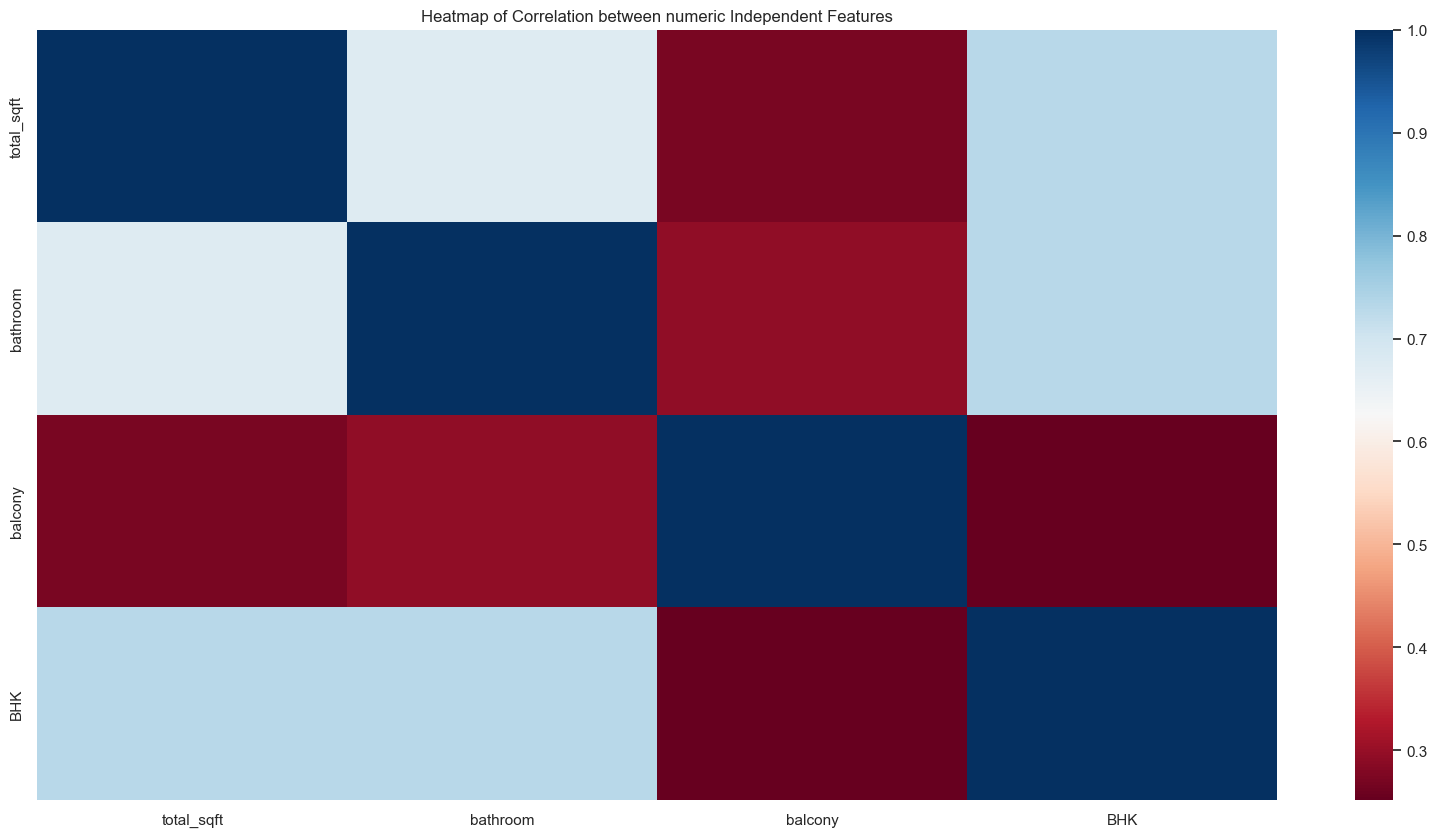

In [234]:
sns.heatmap(num_corr, cmap='RdBu')
plt.title("Heatmap of Correlation between numeric Independent Features")
plt.show()

#### Lets Find Correlation between each Independent feature and Dependent feature [aka - Target]

In [235]:
corr_tot_pr = Data_frame[['total_sqft', 'price']].corr()
corr_tot_pr

,total_sqft,price
total_sqft,1.00,0.84
price,0.84,1.00


In [236]:
pearson_tot_pr = stats.pearsonr(Data_frame['total_sqft'], Data_frame['price'])
pearson_tot_pr

PearsonRResult(statistic=0.837313315814022, pvalue=0.0)

In [237]:
corr_bath_pr = Data_frame[['bathroom', 'price']].corr()
corr_bath_pr

,bathroom,price
bathroom,1.00,0.69
price,0.69,1.00


In [238]:
pearson_bath_pr = stats.pearsonr(Data_frame['bathroom'], Data_frame['price'])
pearson_bath_pr

PearsonRResult(statistic=0.6943379166278151, pvalue=0.0)

In [239]:
corr_bal_pr = Data_frame[['balcony', 'price']].corr()
corr_bal_pr

,balcony,price
balcony,1.00,0.21
price,0.21,1.00


In [240]:
pearson_bal_pr = stats.pearsonr(Data_frame['balcony'], Data_frame['price'])
pearson_bal_pr

PearsonRResult(statistic=0.21291127007474445, pvalue=1.6445046507242963e-70)

In [241]:
corr_bhk_pr = Data_frame[['BHK', 'price']].corr()
corr_bhk_pr

,BHK,price
BHK,1.00,0.73
price,0.73,1.00


In [242]:
pearson_bhk_pr = stats.pearsonr(Data_frame['BHK'], Data_frame['price'])
pearson_bhk_pr

PearsonRResult(statistic=0.7309233001308969, pvalue=0.0)

#### 🔹 Correlation Analysis and Interpretation

The **p-value from the Pearson correlation test is 0** (i.e., **< 0.05**), which means the correlation coefficients are **statistically significant**.

Among the features:

* **`total_sqft`** shows the **strongest positive correlation** with property price.
* **`balcony`** has the **weakest correlation** with price.

> ⚠️ However, it's important to remember that **correlation does not imply causation**.
> Even though `balcony` has a weak statistical correlation, it may still be an **important feature** from a buyer's or real estate perspective when determining property value.





#### 🔹 Understanding Categorical Features

To gain better insights from the **categorical variables**, we will analyze the **average property price** associated with each category.

This helps us understand how different categories (e.g., location, area type, etc.) **influence the average price**, and which ones might be **significant predictors** in our model.


In [243]:
df1 = Data_frame[['area_type', 'price']]
df_g = df1.groupby(['area_type'], as_index=False).mean().sort_values(ascending=False, by='price')
df_g.rename(columns={'price':'avg-price'}, inplace=True)
df_g.set_index('area_type', inplace=True)
df_g

,avg-price
area_type,
Plot Area,155.19
Built-up Area,101.47
Super built-up Area,94.78
Carpet Area,89.66


In [244]:
df2 = Data_frame[['site_location', 'price']]
df_l = df2.groupby(['site_location'], as_index=False).mean().sort_values(ascending=False, by='price')
df_l.rename(columns={'price':'avg-price'}, inplace=True)
df_l.set_index('site_location', inplace=True)
df_l.head(10)

,avg-price
site_location,
Anandnagar,149.03
Baner road,146.20
Karve Road,145.51
Manik Bagh,143.92
Kothrud,141.49
Sinhagad Road,141.26
Bhavani Peth,139.78
Laxmi Road,139.49
Ghorpade Peth,139.49


In [245]:
df3 = Data_frame[['area_type','site_location', 'price']]
df_p = df3.groupby(['area_type','site_location'], as_index=False).mean().sort_values(ascending=False, by='price')
df_p.set_index('area_type', inplace=True)
df_p.rename(columns={'price':'avg-price'}, inplace=True)
df_pivot = pd.pivot_table(df_p, index='area_type', columns='site_location', values='avg-price')
df_pivot.fillna(0, inplace=True)
df_pivot 

site_location,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,Balaji Nagar,Baner,Baner road,Bhandarkar Road,Bhavani Peth,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
area_type,,,,,,,,,,,,,,,,,,,,,
Built-up Area,96.76,78.65,178.33,125.70,85.92,88.53,82.08,170.00,175.50,148.12,...,74.29,147.17,113.20,117.00,135.18,104.71,117.30,99.82,125.87,154.28
Carpet Area,0.00,38.00,0.00,0.00,70.00,0.00,38.00,0.00,0.00,0.00,...,135.00,0.00,59.86,0.00,100.00,0.00,0.00,0.00,0.00,0.00
Plot Area,157.31,153.93,175.64,168.85,125.15,141.12,167.18,160.69,151.50,167.93,...,146.00,157.00,147.94,166.30,168.00,163.88,137.93,190.56,148.14,151.83
Super built-up Area,79.47,85.84,125.60,119.33,147.96,95.67,80.65,130.06,106.35,123.33,...,104.39,118.00,98.20,98.19,111.06,127.43,95.97,122.61,84.71,111.20


In [246]:
Data_frame.columns

Index(['area_type', 'total_sqft', 'bathroom', 'balcony', 'price',
       'site_location', 'BHK'],
      dtype='object')

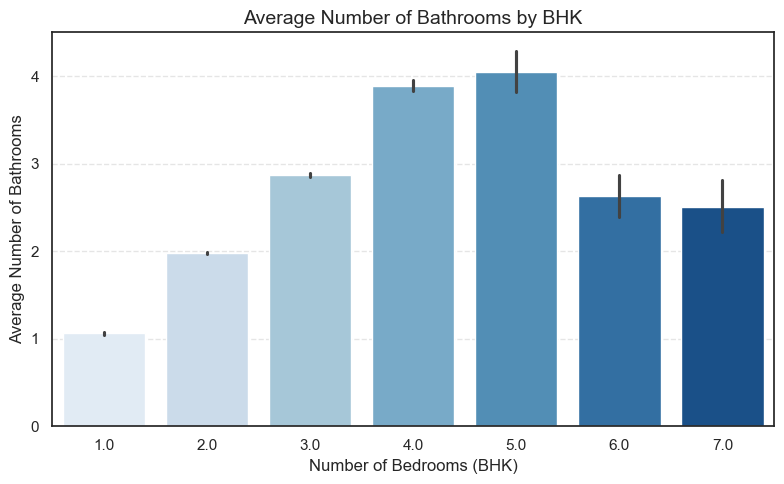

In [250]:
# Plotting the relationship between BHK and average number of bathrooms
plt.figure(figsize=(8, 5))
sns.barplot(x='BHK', y='bathroom', data=Data_frame, palette='Blues', estimator='mean')

plt.title('Average Number of Bathrooms by BHK', fontsize=14)
plt.xlabel('Number of Bedrooms (BHK)', fontsize=12)
plt.ylabel('Average Number of Bathrooms', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

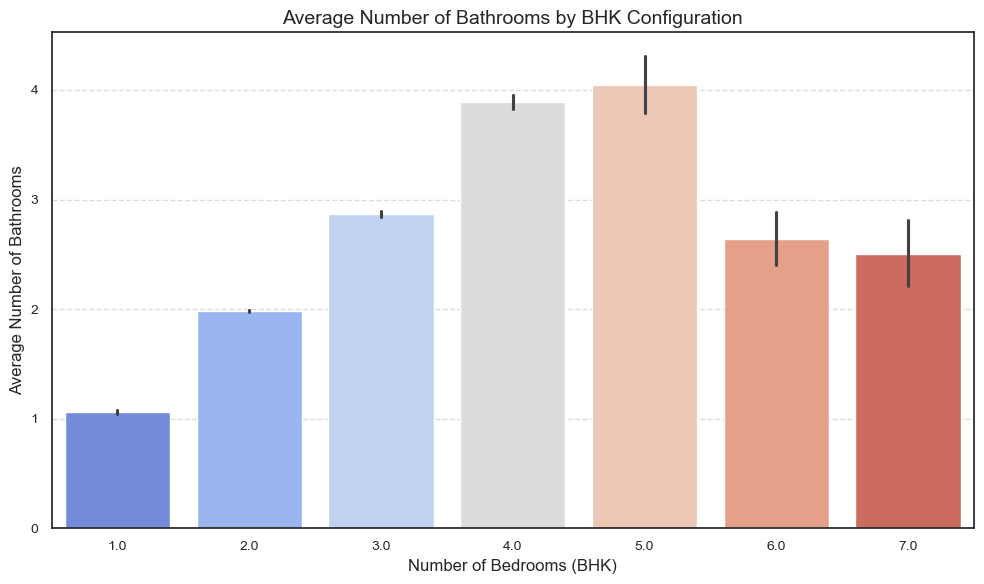

In [251]:
# Bar plot showing average number of bathrooms per BHK
plt.figure(figsize=(10, 6))
sns.barplot(x='BHK', y='bathroom', data=Data_frame, palette='coolwarm')

plt.title('Average Number of Bathrooms by BHK Configuration', fontsize=14)
plt.xlabel('Number of Bedrooms (BHK)', fontsize=12)
plt.ylabel('Average Number of Bathrooms', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [252]:
Data_frame.balcony

0       1
1       0
2       1
3       1
4       1
       ..
7220    2
7221    2
7222    3
7223    2
7225    1
Name: balcony, Length: 6796, dtype: int32

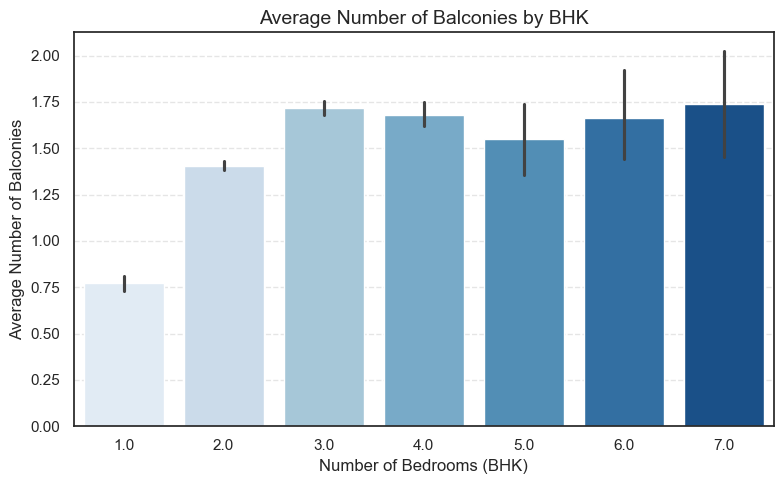

In [253]:
# Plotting the relationship between BHK and average number of balconies
plt.figure(figsize=(8, 5))
sns.barplot(x='BHK', y='balcony', data=Data_frame, palette='Blues', estimator='mean')

plt.title('Average Number of Balconies by BHK', fontsize=14)
plt.xlabel('Number of Bedrooms (BHK)', fontsize=12)
plt.ylabel('Average Number of Balconies', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

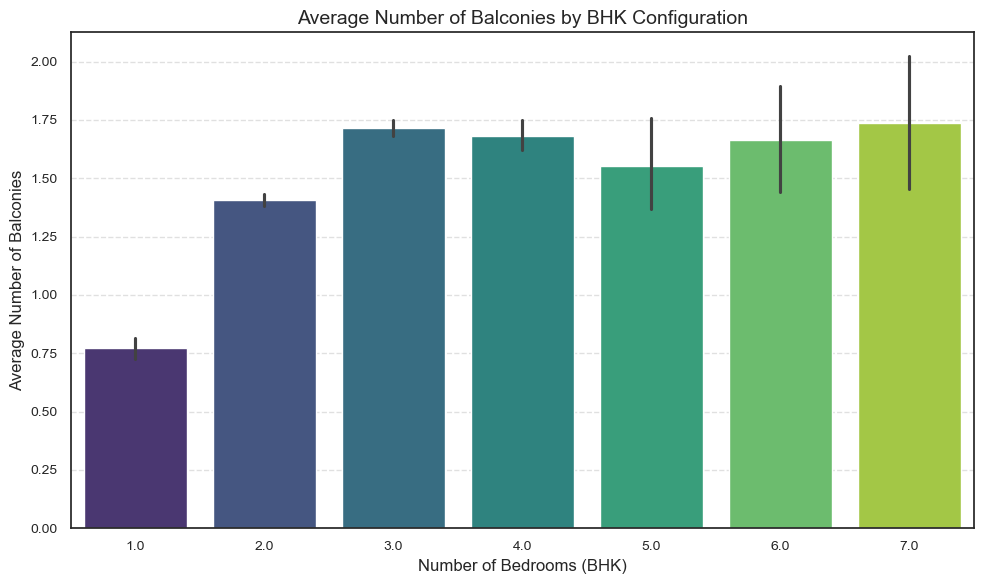

In [254]:
# Bar plot showing average number of balconies per BHK
plt.figure(figsize=(10, 6))
sns.barplot(x='BHK', y='balcony', data=Data_frame, palette='viridis')

plt.title('Average Number of Balconies by BHK Configuration', fontsize=14)
plt.xlabel('Number of Bedrooms (BHK)', fontsize=12)
plt.ylabel('Average Number of Balconies', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

In [255]:
Data_frame.to_csv("Cleaned_data.csv")

## <font color = 'green'> Model Building - ENCODING </font>
#### Encoding the Categoricals features - area_type and location

In [256]:
one_dum = pd.get_dummies(Data_frame['area_type'])
Data_frame = pd.concat([Data_frame, one_dum], axis=1)
Data_frame.drop(['area_type'], axis=1, inplace=True)

In [257]:
Data_frame.head(10)

,total_sqft,bathroom,balcony,price,site_location,BHK,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,900.00,1.00,1,38.00,Alandi Road,1.00,False,False,False,True
1,900.00,1.00,0,40.00,Alandi Road,1.00,False,False,True,False
2,900.00,1.00,1,38.00,Alandi Road,1.00,False,False,False,True
3,900.00,1.00,1,65.00,Alandi Road,1.00,False,False,False,True
4,1056.00,2.00,1,39.07,Alandi Road,2.00,False,False,False,True
5,1084.00,2.00,2,50.00,Alandi Road,2.00,False,False,False,True
6,1000.00,2.00,1,38.00,Alandi Road,2.00,True,False,False,False
7,1230.00,2.00,2,80.00,Alandi Road,2.00,False,False,False,True
8,995.00,2.00,1,41.00,Alandi Road,2.00,True,False,False,False
9,1360.00,2.00,1,95.00,Alandi Road,2.00,False,False,False,True


In [258]:
ne_dum = pd.get_dummies(Data_frame['site_location'])
Data_frame = pd.concat([Data_frame, ne_dum], axis=1)
Data_frame.drop(['site_location'], axis=1, inplace=True)

In [259]:
Data_frame.head(10)

,total_sqft,bathroom,balcony,price,BHK,Built-up Area,Carpet Area,Plot Area,Super built-up Area,Alandi Road,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,900.00,1.00,1,38.00,1.00,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
1,900.00,1.00,0,40.00,1.00,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
2,900.00,1.00,1,38.00,1.00,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
3,900.00,1.00,1,65.00,1.00,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
4,1056.00,2.00,1,39.07,2.00,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
5,1084.00,2.00,2,50.00,2.00,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
6,1000.00,2.00,1,38.00,2.00,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
7,1230.00,2.00,2,80.00,2.00,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
8,995.00,2.00,1,41.00,2.00,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
9,1360.00,2.00,1,95.00,2.00,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False


# <font color = 'green'> Model Building - Building a Regression Model </font>
### Spliting using Train-Test Split

In [260]:
Data_frame.shape

(6796, 106)

In [261]:
X = Data_frame.drop(['price'], axis=1)
X.shape

(6796, 105)

In [262]:
Y = Data_frame['price']
Y.shape

(6796,)

In [263]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.17, random_state=42)
print(f"{X_train.shape} \n {X_test.shape} \n {Y_train.shape} \n {Y_test.shape}")

(5640, 105) 
 (1156, 105) 
 (5640,) 
 (1156,)


## <font color = 'blue'>Multiple Linear Regression</font> Model

In [264]:
LinearModel = LinearRegression()
LinearModel.fit(X_train, Y_train)
Y_pred = LinearModel.predict(X_test)
Y_pred

array([ 21.46480429,  66.68362538,  55.05429674, ..., 146.41486419,
       131.03590835,  73.03262049])

In [265]:
Y_pred_train = LinearModel.predict(X_train)
Y_pred_train

array([ 77.21220065, 174.38593383,  54.6162119 , ..., 201.7004046 ,
       183.16456306,  61.0671451 ])

In [266]:
# mse value - Test
MSE = mse(Y_test, Y_pred)
MSE

798.6712463305672

In [267]:
# mse value - train
MSE_t = mse(Y_train, Y_pred_train)
MSE_t

834.4787392109296

#### <b> R square value - train and test </b>

In [268]:
# R^2 Value - Train
r2_val_t = LinearModel.score(X_train, Y_train)
r2_val_t

0.796825341812284

In [269]:
# R^2 Value - Test
r2_val = LinearModel.score(X_test, Y_test)
r2_val

0.793512210763039

In [270]:
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)

0.793512210763039

In [271]:
r2_score(Y_train, Y_pred_train)

0.796825341812284

In [272]:
LinearModel.intercept_

-39.17713896755657

In [273]:
for i in range(0, 6):
    print(LinearModel.coef_[i])

0.0802354324722761
10.634592108389855
-0.129317794532545
5.74304942412126
-9.045992982810084
2.274250643828225


#### <b> Dist and Scatter Plot </b>

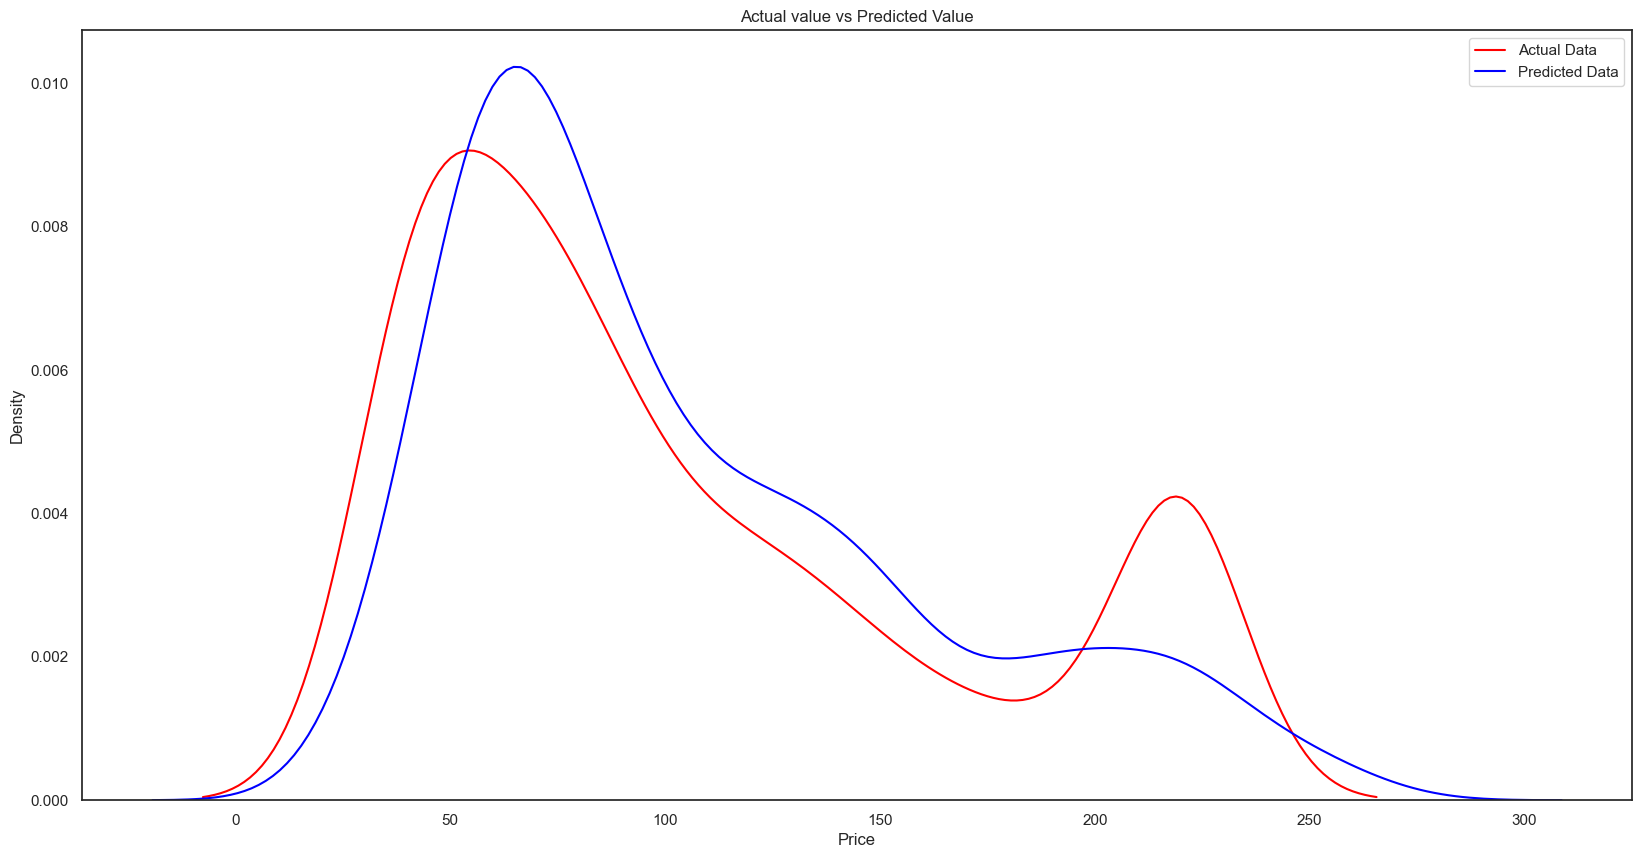

In [274]:
# Dist Plot
axis = sns.distplot(x=Y_test, hist=False, color='red', label='Actual Data')
sns.distplot(x=Y_pred, hist=False, color='blue', label='Predicted Data', ax=axis)
plt.xlabel('Price')
plt.title('Actual value vs Predicted Value')
plt.legend(loc='best')
plt.show()

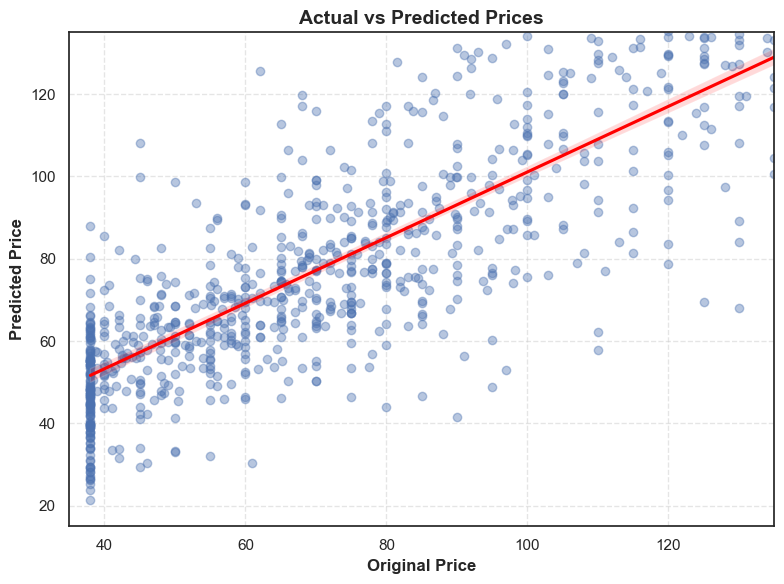

In [275]:
sns.set(color_codes=True)
sns.set_style("white")

plt.figure(figsize=(8, 6))
ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha': 0.4}, line_kws={"color": "red"})

ax.set_xlabel('Original Price', fontsize=12, fontweight='bold')
ax.set_ylabel('Predicted Price', fontsize=12, fontweight='bold')
ax.set_xlim(35, 135)
ax.set_ylim(15, 135)
plt.title('Actual vs Predicted Prices', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

#### <font color = 'red'>Using K Fold cross validation score to measure accuracy of our LinearRegression model</font>

In [276]:
cv = KFold(n_splits=8, random_state=None)
cross_val_score(LinearRegression(), X, Y, cv=cv)

array([-1.95557558e+18, -1.93572952e+17,  7.58548464e-01, -2.09244638e+16,
        7.62862656e-01, -1.84215680e+17, -1.28727637e+17,  7.95196829e-01])

In [277]:
result = cross_val_score(LinearRegression(), X, Y, cv=cv)
print(f"Average Accuracy - {result.mean()}")

Average Accuracy - -3.103770394941469e+17


## Decision tree for Regression / Prediction ?

In [278]:
Tree_model = DecisionTreeRegressor(max_depth=5)
Tree_model.fit(X_train, Y_train)
Y_hat = Tree_model.predict(X_test)

In [279]:
# R^2 Value
r2_val_t = Tree_model.score(X_test, Y_test)
r2_val_t

0.7953806769165337

In [280]:
cvt = KFold(n_splits=10, random_state=None)
cross_val_score(DecisionTreeRegressor(max_depth=5), X, Y, cv=cvt)

array([0.80316577, 0.7713573 , 0.79620038, 0.79519659, 0.77941242,
       0.80522734, 0.80230226, 0.83269649, 0.80835264, 0.80469495])

In [281]:
result_t = cross_val_score(DecisionTreeRegressor(max_depth=6), X, Y, cv=cvt)
print(f"Average Accuracy - {result_t.mean()}")

Average Accuracy - 0.8046824737573444


In [282]:
X.columns

Index(['total_sqft', 'bathroom', 'balcony', 'BHK', 'Built-up  Area',
       'Carpet  Area', 'Plot  Area', 'Super built-up  Area', 'Alandi Road',
       'Ambegaon Budruk',
       ...
       'Uruli Devachi', 'Vadgaon Budruk', 'Viman Nagar', 'Vishrant Wadi',
       'Wadgaon Sheri', 'Wagholi', 'Wakadewadi', 'Wanowrie', 'Warje',
       'Yerawada'],
      dtype='object', length=105)

#### Multiple Linear Regression Model gives better Accuracy than Decision tree

## Random Forest

In [283]:
rf = RandomForestRegressor(n_estimators=105)
rf.fit(X_train, Y_train)
Y_pred_rf = rf.predict(X_test)

In [284]:
# R^2 Value
r2_val_rf = rf.score(X_test, Y_test)
r2_val_rf

0.7892795573756235

In [285]:
cvt = KFold(n_splits=8, random_state=None)
cross_val_score(RandomForestRegressor(max_depth=6, n_estimators=105), X, Y, cv=cvt)

array([0.81844083, 0.78564269, 0.78657789, 0.81852035, 0.8004528 ,
       0.82987764, 0.82991338, 0.82608332])

In [286]:
result_t = cross_val_score(RandomForestRegressor(max_depth=6, n_estimators=105), X, Y, cv=cvt)
print(f"Average Accuracy - {result_t.mean()}")

Average Accuracy - 0.8122347379290625


## Using Lazy-Predict

In [287]:
import lazypredict
from lazypredict.Supervised import LazyRegressor
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000217 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 274
[LightGBM] [Info] Number of data points in the train set: 5640, number of used features: 4
[LightGBM] [Info] Start training from score 107.217316


In [288]:
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LGBMRegressor,0.77,0.80,28.14,0.78
HistGradientBoostingRegressor,0.77,0.79,28.19,0.30
GradientBoostingRegressor,0.77,0.79,28.25,0.25
MLPRegressor,0.76,0.78,29.04,5.17
XGBRegressor,0.76,0.78,29.21,1.09
KNeighborsRegressor,0.76,0.78,29.28,0.05
RandomForestRegressor,0.75,0.78,29.37,0.74
BaggingRegressor,0.75,0.77,29.61,0.12
SVR,0.75,0.77,29.94,1.96


### <b>Result</b> -  Using Linear Regression as the Base model as it gives a good result and is less time consuming

## <b> Testing Model for Few Properties </b>

In [289]:
def predict_price(area_type, location, sqft, balcony, bathroom, BHK):
    area_index = np.where(X.columns==area_type)[0][0]
    loc_index = np.where(X.columns==location)[0][0]
    
    lis = np.zeros(len(X.columns))
    lis[0] = sqft
    lis[1] = bathroom
    lis[2] = balcony
    lis[3] = BHK
    
    if loc_index >=0 and area_index >=0:
        lis[area_index] = 1
        lis[loc_index] = 1
    
    return round(LinearModel.predict([lis])[0], 2)
    

In [291]:
predict_price('Carpet  Area', 'Baner', 1250, 2, 2, 3)

88.1

## Export the Model to a Pickle File 

In [292]:
import pickle
with open('bangalore_home_prices_model.pickle', 'wb') as obj:
    pickle.dump(LinearModel, obj)

## Importing Columns 


In [293]:
import json
columns = {
    'Columns': [col.lower() for col in X.columns]
}
with open("Columns.json", 'w') as f:
    f.write(json.dumps(columns))

 **reflective section**  summarizing **observations, learnings, and challenges overcome**


## 🔍 Final Observations & Learnings

### ✅ **Key Learnings from the Assignment**

This end-to-end assignment of housing price prediction in Pune provided deep hands-on exposure across all stages of a machine learning project:

---

### 🔹 **1. Data Cleaning & EDA (Part 1)**

* **Learnings:**

  * Understood the importance of cleaning inconsistencies in features like `total_sqft`, removing outliers, handling missing values, and converting string-based sqft formats.
  * Developed domain intuition by exploring distributions of `price`, `BHK`, `balcony`, and `bathroom`.

* **Challenge:**

  * Handling the `total_sqft` column which had mixed formats (`range`, `string`, `float`) was tricky.
  * **Solution:** Implemented a custom function to extract and average values for ranges (e.g., `'900 - 1200' → 1050`) and converted all values to numeric.

---

### 🔹 **2. Visualization and Feature Relationships**

* **Learnings:**

  * Used bar plots and scatter plots to uncover relationships between features like `BHK` vs `price`, `bathroom` vs `BHK`, and more.
  * Got clarity on how multivariate data can be visually explored to form hypotheses about which variables are most predictive.

* **Challenge:**

  * Differentiating between visual correlation and statistical correlation required careful interpretation.
  * **Solution:** Combined Seaborn visualizations with Pearson correlation scores to validate assumptions.

---

### 🔹 3. Correlation Analysis & Model Building **

* **Learnings:**

  * Discovered that `total_sqft`, `BHK`, and `bathroom` had a strong positive correlation with `price`, while `balcony` had weak correlation.
  * Learned how to one-hot encode categorical features like `area_type` and `site_location` to prepare for regression models.
  * Built and evaluated multiple models: Linear Regression, Decision Tree, Random Forest, and ensemble models via LazyPredict.
  * Understood how overfitting can be detected using R² and cross-validation.

* **Challenge:**

  * Faced negative R² and extreme CV values with Linear Regression due to unscaled or sparse one-hot features.
  * **Solution:** Tried alternate models (Decision Trees, Random Forests), and used LazyPredict to find better-performing ensemble methods like LightGBM.

---

### 🌟 **Biggest Takeaways**

1. **Data cleaning is 70% of the work** – without proper preprocessing, even the best models fail.
2. **Correlation != Causation** – not all statistically weak features should be discarded without domain reasoning.
3. **Cross-validation is essential** – especially when the dataset has category imbalance or sparsity in one-hot features.
4. **Model interpretability vs. accuracy** – linear regression is interpretable but less accurate than ensemble methods.

---

### 🧠 **What I Would Do Differently Next Time**

* Use **log-transformed prices** to handle skewed target distributions.
* Try **feature scaling and regularization** (Lasso, Ridge) to improve generalization.
* Perform **feature importance analysis** post-modeling to validate assumptions.
* Add **automated pipelines (via sklearn’s Pipeline or MLflow)** for reproducibility.

---

### 💡 Conclusion

This assignment sharpened my practical understanding of the complete ML pipeline — from raw CSV to working model. It bridged the gap between theoretical concepts and real-world data quirks, enhancing both my coding and analytical thinking. It also reinforced the idea that **no ML model can succeed without a solid foundation in EDA, feature engineering, and business understanding.**

---
